<a href="https://colab.research.google.com/github/jpfsc/TCC-MBA-PUC-RJ/blob/main/Machine_on_Rocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------------------------
PUC-RJ / CCE  -  BI MASTER 2021.2 <br>
Prova de conceito do curso: Uso de IA em Petrofísica
# *Machine on Rocks: uso de machine learning para agrupamento de fácies petrofísicas e classificação de fácies em rochas carbonáticas carstificadas*

Aluno: João Paulo Teixeira da Fonseca

Mat.: 211.101.145

---------------------------------------------------------

# About dataset

Overview:

These dataset contain petrographic, petrophysical and geochemical analysis of 157 carbonate samples colected on outcrop of Jandaíra Formation Apodi Karst System, Potiguar Basin, Brazil.

The features include:

*Metadata*
* Sample (sample code)

*Petrographic*
* Lithology
* Grain Size / Crystallinity
* Sorting
* Pore type 1st (Main pore type)
* Cement 1st (Main cement)
* Pore Size
* Pore Size Mean (mm)
* Pore Size Max Vug Size in plug (mm)

*Petrology Interpretation*
* Depositional System
* Main Diagenetic Environment
* Microfacies

*Routine Petrophysical Analysis*
* Phi (%)
* Kabs (mD)
* GrainDensity (g/cc)

*Geochemical*
* Calcite+
* Dolomite+
* QFM+
------------------------------------

_Reference:_ 

(1) Bagni, Fabio Luiz. 2021. O Carste Jandaíra, Bacia Potiguar, e suas implicações para a qualidade de reservatórios. Tese de Doutorado. UFRN:  Centro de Ciências Exatas e da Terra, Programa de pós-graduação em Geodinâmica e Geofísica. Natal, RN.  217p.

(2) Bagni et al. 2022. Karstified layer and caves formed by superposed epigenetic dissolution along subaerial unconformities in carbonate rocks - Impact on reservoir-scale permeability. Marine and Petroleum Geology: 138

(3) [Geology is the way](https://geologyistheway.com/sedimentary/sorting/)

# Google Drive Setup

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
# Set dataset local
path = "drive/MyDrive/Colab Notebooks/BIM_PoC/dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1 - ETL: _Extract, Transform and Load_

_Setup_

In [9]:
# Libraries for data loading and manipulation
import pandas as pd
import missingno as msno  # missing values

## Extract Data from excel spreadsheet

In [10]:
url = "https://github.com/jpfsc/TCC-MBA-PUC-RJ/blob/main/Jandaira_DB.xlsx"

Petrography = pd.read_excel(url, "Petrography")
Geochemical = pd.read_excel(url, "Geochemical")
RoutineCoreAnalysis = pd.read_excel(url, "RoutineCoreAnalysis")

ValueError: ignored

In [ ]:
path = https://github.com/jpfsc/TCC-MBA-PUC-RJ/blob/main/
file = 'Jandaira_DB.xlsx'

Petrography = pd.read_excel(path + file, "Petrography")
Geochemical = pd.read_excel(path + file, "Geochemical")
RoutineCoreAnalysis = pd.read_excel(path + file, "RoutineCoreAnalysis")

## Data Inspection <br>

In [ ]:
Petrography.head()

,Sample,Lithology,Depositional System,GrainSize / Crystallinity,Sorting,Compaction,Pore Type 1st,Pore Type 2nd,Cement 1st,Cement 2nd,Main Diagenetic Environment,Pore Size,Pore Size Mean (mm),Pore Size Max (mm),Por Size Max Vug Size in plug (mm),OBS,OBS2,Microfacies
0,PFJ04F,BioFLT,Lagoonal,NaN,NaN,1.0,Micro Intraparticle,Wp,Blocky,Granular,Burial,Microporo - limite visualização do poro,0.0100,0.010,0.0,"Brechas, exposição? Raizes? Solo?",NaN,MF 4
1,PFJ08F,BioFLT,Lagoonal,NaN,NaN,3.0,Micro Intraparticle,Micro Intraparticle,Granular,Blocky,Meteoric Phreatic,Microporo - limite visualização do poro,0.0100,0.010,0.0,NaN,NaN,MF 4
2,PFJ09A,BioPCK,Bc Sand-Shoals,NaN,NaN,2.0,Micro Intraparticle,Micro Intraparticle,Blocky,Syntaxial Overgrowth,Burial,Microporo - limite visualização do poro,0.0100,0.010,0.0,NaN,NaN,MF 1
3,PFJ09G,BioPCK,Bc Sand-Shoals,NaN,NaN,2.0,Micro Intraparticle,NaN,Granular,Syntaxial Overgrowth,Meteoric Phreatic,Microporo - limite visualização do poro,0.0100,0.010,0.0,NaN,NaN,MF 1
4,PFJ02H,BioGST,Bc Sand-Shoals,Very Coarse Sand,Poorly Sorted,3.0,Partial Moldic,Micro Intraparticle,Granular,Syntaxial Overgrowth,Meteoric Phreatic,"Mesoporo muito pequeno 0,125 mm ao limite visu...",0.0625,0.125,0.0,NaN,"gastropode, alga verde, miliolidio, Gastropode...",MF 1


In [ ]:
Geochemical.head()

,Sample,Calcite+,Dolomite+,QFM+,Rutilo,Muscovite,Kaolinite,Quartz,K-Feldspar,Mg-Calcite,...,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SO3
0,PFJ01A,99.90,0.00,0.01,0.00,0.00,0.00,0.01,0.0,0.0,...,0.02,0.36,0.17,0.00,0.42,55.71,0.03,0.01,0.04,0.04
1,PFJ01B,99.24,0.12,0.64,0.03,0.01,0.14,0.46,0.0,0.1,...,0.02,0.36,0.11,0.00,0.18,54.74,0.03,0.01,0.08,0.02
2,PFJ01C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PFJ01C2,96.04,0.00,3.95,0.19,0.00,0.00,3.76,0.0,0.0,...,0.08,1.44,0.48,0.01,0.24,52.22,0.04,0.11,0.10,0.02
4,PFJ01D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
RoutineCoreAnalysis.head()

,Sample,Vp0(cc),Vp (cc),PHI0(%),Phi(%),K[n2](mD),Pc(psi),Kabs(mD),b[n2](psi),α(μm),...,BulkDensity (g/cm³),Gas,Vb(cc),GrainDensity (g/cc),Date,Time,Length(mm),Diameter(mm),Weight(g),Vb-Vp
0,PFJ01A,2.298617,2.224828,12.884066,12.522265,0.469541,1000.0,0.291412,9.168899,402.282579,...,2.516410,N2,17.766981,2.876629,7/26/2019 18:38,18:38:44,NaN,NaN,44.709000,15.542153
1,PFJ01B,2.023490,1.984149,17.864811,17.578541,14.051760,1000.0,12.119130,2.392051,1069.796895,...,2.016685,N2,11.287338,2.446796,7/29/2019 13:23,13:23:21,NaN,NaN,22.763000,9.303188
2,PFJ01C1,2.608145,2.527143,13.219071,12.861325,11.199420,1000.0,9.441005,2.793790,4505.590793,...,2.132559,N2,19.649164,2.447316,7/26/2019 10:06,10:06:56,NaN,NaN,41.903000,17.122021
3,PFJ01C2,3.969460,3.915401,22.197741,21.961831,276.022800,1000.0,259.999700,0.924411,24.810653,...,1.955104,N2,17.828211,2.505317,7/26/2019 17:32,17:32:51,NaN,NaN,34.855999,13.912809
4,PFJ01D1,1.590144,1.524173,10.177251,9.796385,0.186741,1000.0,0.096247,14.103500,2655.035170,...,2.451133,N2,15.558520,2.717333,7/29/2019 12:06,12:06:14,NaN,NaN,38.136002,14.034347


In [ ]:
Petrography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sample                              165 non-null    object 
 1   Lithology                           158 non-null    object 
 2   Depositional System                 158 non-null    object 
 3   GrainSize / Crystallinity           112 non-null    object 
 4   Sorting                             89 non-null     object 
 5   Compaction                          157 non-null    float64
 6   Pore Type 1st                       157 non-null    object 
 7   Pore Type 2nd                       155 non-null    object 
 8   Cement 1st                          156 non-null    object 
 9   Cement 2nd                          132 non-null    object 
 10  Main Diagenetic Environment         146 non-null    object 
 11  Pore Size                           146 non-n

In [ ]:
Geochemical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample       159 non-null    object 
 1   Calcite+     74 non-null     float64
 2   Dolomite+    74 non-null     float64
 3   QFM+         74 non-null     float64
 4   Rutilo       74 non-null     float64
 5   Muscovite    74 non-null     float64
 6   Kaolinite    74 non-null     float64
 7   Quartz       74 non-null     float64
 8   K-Feldspar   74 non-null     float64
 9   Mg-Calcite   74 non-null     float64
 10  Calcite      74 non-null     float64
 11  Dolomite     74 non-null     float64
 12  Fe-Dolomite  74 non-null     float64
 13  SiO2         74 non-null     float64
 14  TiO2         74 non-null     float64
 15  Al2O3        74 non-null     float64
 16  Fe2O3        74 non-null     float64
 17  MnO          74 non-null     float64
 18  MgO          74 non-null     float64
 19  CaO     

In [ ]:
Petrography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sample                              165 non-null    object 
 1   Lithology                           158 non-null    object 
 2   Depositional System                 158 non-null    object 
 3   GrainSize / Crystallinity           112 non-null    object 
 4   Sorting                             89 non-null     object 
 5   Compaction                          157 non-null    float64
 6   Pore Type 1st                       157 non-null    object 
 7   Pore Type 2nd                       155 non-null    object 
 8   Cement 1st                          156 non-null    object 
 9   Cement 2nd                          132 non-null    object 
 10  Main Diagenetic Environment         146 non-null    object 
 11  Pore Size                           146 non-n

## Transform data

In [ ]:
df1 = pd.merge(Petrography, Geochemical,
              how='inner',
              on='Sample')

df2 = pd.merge(df1, RoutineCoreAnalysis,
              how='outer',
              on='Sample')

df2.head()

,Sample,Lithology,Depositional System,GrainSize / Crystallinity,Sorting,Compaction,Pore Type 1st,Pore Type 2nd,Cement 1st,Cement 2nd,...,BulkDensity (g/cm³),Gas,Vb(cc),GrainDensity (g/cc),Date,Time,Length(mm),Diameter(mm),Weight(g),Vb-Vp
0,PFJ04F,BioFLT,Lagoonal,NaN,NaN,1.0,Micro Intraparticle,Wp,Blocky,Granular,...,2.587050,N2,18.352716,2.672788,7/31/2019 11:24,11:24:46,NaN,NaN,47.479401,17.763999
1,PFJ08F,BioFLT,Lagoonal,NaN,NaN,3.0,Micro Intraparticle,Micro Intraparticle,Granular,Blocky,...,2.465488,N2,13.558942,2.691448,2019-08-06 10:36:57,10:36:57,NaN,NaN,33.429401,12.420603
2,PFJ09A,BioPCK,Bc Sand-Shoals,NaN,NaN,2.0,Micro Intraparticle,Micro Intraparticle,Blocky,Syntaxial Overgrowth,...,2.464450,N2,14.068049,2.566891,2019-08-06 12:14:16,12:14:16,NaN,NaN,34.669998,13.506609
3,PFJ09G,BioPCK,Bc Sand-Shoals,NaN,NaN,2.0,Micro Intraparticle,NaN,Granular,Syntaxial Overgrowth,...,2.511511,N2,13.629843,2.620006,2019-08-06 15:03:42,15:03:42,NaN,NaN,34.231499,13.065425
4,PFJ02H,BioGST,Bc Sand-Shoals,Very Coarse Sand,Poorly Sorted,3.0,Partial Moldic,Micro Intraparticle,Granular,Syntaxial Overgrowth,...,2.340226,N2,18.048810,2.710803,2019-07-23 16:06:16,16:06:16,NaN,NaN,42.238300,15.581472


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sample                              159 non-null    object 
 1   Lithology                           158 non-null    object 
 2   Depositional System                 158 non-null    object 
 3   GrainSize / Crystallinity           112 non-null    object 
 4   Sorting                             89 non-null     object 
 5   Compaction                          157 non-null    float64
 6   Pore Type 1st                       157 non-null    object 
 7   Pore Type 2nd                       155 non-null    object 
 8   Cement 1st                          156 non-null    object 
 9   Cement 2nd                          132 non-null    object 
 10  Main Diagenetic Environment         146 non-null    object 
 11  Pore Size                           146 non-n

### _Missing Data_

In [ ]:
df2.isnull().mean()

Sample                       0.000000
Lithology                    0.006289
Depositional System          0.006289
GrainSize / Crystallinity    0.295597
Sorting                      0.440252
                               ...   
Time                         0.069182
Length(mm)                   1.000000
Diameter(mm)                 1.000000
Weight(g)                    0.069182
Vb-Vp                        0.069182
Length: 61, dtype: float64

In [ ]:
df2.isna().sum()

Sample                         0
Lithology                      1
Depositional System            1
GrainSize / Crystallinity     47
Sorting                       70
                            ... 
Time                          11
Length(mm)                   159
Diameter(mm)                 159
Weight(g)                     11
Vb-Vp                         11
Length: 61, dtype: int64

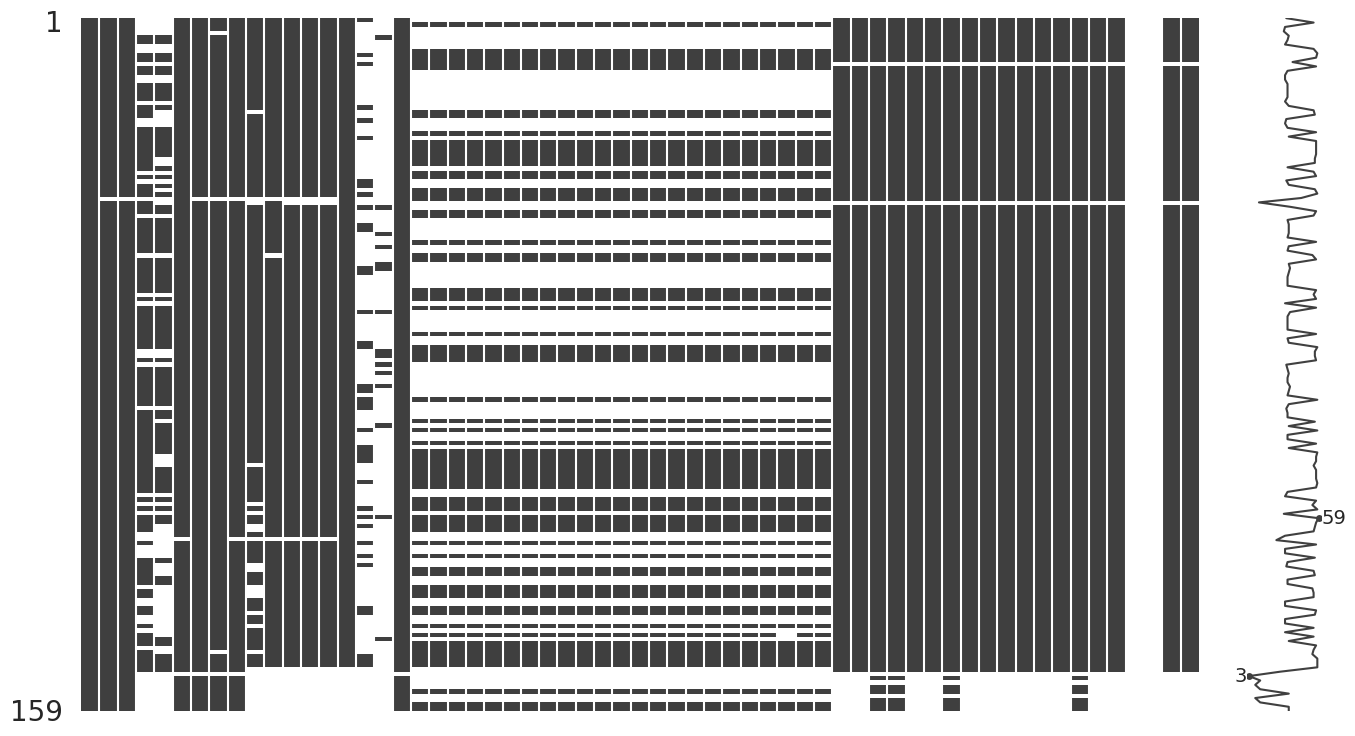

In [ ]:
msno.matrix(df2, figsize=(16,9));

In [ ]:
df2['Lithology'] = df2['Lithology'].fillna('N/A')
df2['Microfacies'] = df2['Microfacies'].fillna('N/A')
df2['Depositional System'] = df2['Depositional System'].fillna('N/A')

df2['GrainSize / Crystallinity'] = df2['GrainSize / Crystallinity'].fillna('N/A')
df2['Sorting'] = df2['Sorting'].fillna('N/A')
df2['Pore Type 1st'] = df2['Pore Type 1st'].fillna('N/A')
df2['Cement 1st'] = df2['Cement 1st'].fillna('N/A')

### _Cleaning Data_

In [ ]:
df2.columns

Index(['Sample', 'Lithology', 'Depositional System',
       'GrainSize / Crystallinity', 'Sorting', 'Compaction', 'Pore Type 1st',
       'Pore Type 2nd', 'Cement 1st', 'Cement 2nd',
       'Main Diagenetic Environment', 'Pore Size', 'Pore Size Mean (mm)',
       'Pore Size Max (mm)', 'Por Size Max Vug Size in plug (mm)', 'OBS',
       'OBS2', 'Microfacies', 'Calcite+', 'Dolomite+', 'QFM+', 'Rutilo',
       'Muscovite', 'Kaolinite', 'Quartz', 'K-Feldspar', 'Mg-Calcite',
       'Calcite', 'Dolomite', 'Fe-Dolomite', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3',
       'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'SO3', 'Vp0(cc)', 'Vp (cc)',
       'PHI0(%)', 'Phi(%)', 'K[n2](mD)', 'Pc(psi)', 'Kabs(mD)', 'b[n2](psi)',
       'α(μm)', 'β(ft⁻¹)', 'BulkDensity (g/cm³)', 'Gas', 'Vb(cc)',
       'GrainDensity (g/cc)', 'Date', 'Time', 'Length(mm)', 'Diameter(mm)',
       'Weight(g)', 'Vb-Vp'],
      dtype='object')

In [ ]:
column2drop = ['Compaction', 'Pore Type 2nd', 'Cement 2nd', 'Pore Size Max (mm)', 'OBS', 'OBS2',               
               'Vp0(cc)', 'Vp (cc)', 'PHI0(%)', 'K[n2](mD)', 'Pc(psi)', 'b[n2](psi)',
               'α(μm)', 'β(ft⁻¹)', 'BulkDensity (g/cm³)', 'Gas', 'Vb(cc)', 'Date', 'Time', 'Length(mm)',
               'Diameter(mm)', 'Weight(g)', 'Vb-Vp',
               'Rutilo', 'Muscovite','Kaolinite','Quartz','K-Feldspar','Mg-Calcite',
               'Calcite', 'Dolomite', 'Fe-Dolomite', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO',
               'Na2O', 'K2O', 'P2O5', 'SO3'
               ]

df_clean = df2.drop(columns=column2drop)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sample                              159 non-null    object 
 1   Lithology                           159 non-null    object 
 2   Depositional System                 159 non-null    object 
 3   GrainSize / Crystallinity           159 non-null    object 
 4   Sorting                             159 non-null    object 
 5   Pore Type 1st                       159 non-null    object 
 6   Cement 1st                          159 non-null    object 
 7   Main Diagenetic Environment         146 non-null    object 
 8   Pore Size                           146 non-null    object 
 9   Pore Size Mean (mm)                 146 non-null    float64
 10  Por Size Max Vug Size in plug (mm)  149 non-null    float64
 11  Microfacies                         159 non-n

### _Categorical Features Transformations_

In [ ]:
df_clean.loc[df_clean['Microfacies'] == 'MF 5a', 'Microfacies'] = 'MF 5'
df_clean.loc[df_clean['Microfacies'] == 'MF 5b', 'Microfacies'] = 'MF 5'
df_clean.loc[df_clean['Microfacies'] == 'MF 5c', 'Microfacies'] = 'MF 5'

df_clean.loc[df_clean['Pore Type 1st'] == 'Partial Moldic', 'Pore Type 1st'] = 'Moldic'

In [ ]:
df_clean['Main Depositional System'] = df_clean['Depositional System']

df_clean.loc[df_clean['Main Depositional System'] == 'Bc Sand-Shoals', 'Main Depositional System'] = 'Subtidal'
df_clean.loc[df_clean['Main Depositional System'] == 'Pel Sand-Shoals', 'Main Depositional System'] = 'Subtidal'
df_clean.loc[df_clean['Main Depositional System'] == 'Lagoonal', 'Main Depositional System'] = 'Subtidal'
df_clean.loc[df_clean['Main Depositional System'] == 'Upper Supratidal', 'Main Depositional System'] = 'Peritidal'
df_clean.loc[df_clean['Main Depositional System'] == 'Lower Supratidal', 'Main Depositional System'] = 'Peritidal'
df_clean.loc[df_clean['Main Depositional System'] == 'Upper intertidal', 'Main Depositional System'] = 'Peritidal'
df_clean.loc[df_clean['Main Depositional System'] == 'Lower Intertidal', 'Main Depositional System'] = 'Peritidal'

df_clean.loc[df_clean['Sorting'] == 'Very Poorly Sorted', 'Sorting'] = 'Very Poorly to Poorly Sorted'
df_clean.loc[df_clean['Sorting'] == 'Poorly Sorted', 'Sorting'] = 'Very Poorly to Poorly Sorted'
df_clean.loc[df_clean['Sorting'] == 'Well Sorted', 'Sorting'] = 'Well to Very Well Sorted'
df_clean.loc[df_clean['Sorting'] == 'Very Well Sorted', 'Sorting'] = 'Well to Very Well Sorted'

In [ ]:
df_clean['Main Diagenetic Environment'].unique()

array(['Burial', 'Meteoric Phreatic', 'Marine', 'Eogenetic',
       'Pedogenesis', nan, 'Telogenetic'], dtype=object)

## Save data to dataframe

In [ ]:
df_clean.to_csv(path+'PETRO_CARBONATE_Data.csv')
df_clean.head()

,Sample,Lithology,Depositional System,GrainSize / Crystallinity,Sorting,Pore Type 1st,Cement 1st,Main Diagenetic Environment,Pore Size,Pore Size Mean (mm),Por Size Max Vug Size in plug (mm),Microfacies,Calcite+,Dolomite+,QFM+,Phi(%),Kabs(mD),GrainDensity (g/cc),Main Depositional System
0,PFJ04F,BioFLT,Lagoonal,N/A,N/A,Micro Intraparticle,Blocky,Burial,Microporo - limite visualização do poro,0.0100,0.0,MF 4,NaN,NaN,NaN,3.207795,0.007233,2.672788,Subtidal
1,PFJ08F,BioFLT,Lagoonal,N/A,N/A,Micro Intraparticle,Granular,Meteoric Phreatic,Microporo - limite visualização do poro,0.0100,0.0,MF 4,99.61,0.0,0.0,8.395485,0.217445,2.691448,Subtidal
2,PFJ09A,BioPCK,Bc Sand-Shoals,N/A,N/A,Micro Intraparticle,Blocky,Burial,Microporo - limite visualização do poro,0.0100,0.0,MF 1,NaN,NaN,NaN,3.990889,0.006334,2.566891,Subtidal
3,PFJ09G,BioPCK,Bc Sand-Shoals,N/A,N/A,Micro Intraparticle,Granular,Meteoric Phreatic,Microporo - limite visualização do poro,0.0100,0.0,MF 1,NaN,NaN,NaN,4.141046,0.008255,2.620006,Subtidal
4,PFJ02H,BioGST,Bc Sand-Shoals,Very Coarse Sand,Very Poorly to Poorly Sorted,Moldic,Granular,Meteoric Phreatic,"Mesoporo muito pequeno 0,125 mm ao limite visu...",0.0625,0.0,MF 1,NaN,NaN,NaN,13.670365,0.175061,2.710803,Subtidal


--------------------------------------------------------------------

# Part 2 - Petrophysical Rock Type Modeling

_Setup_

In [ ]:
# Libraries for data loading and manipulation
import pandas as pd
import numpy as np

In [ ]:
data = df_clean.copy()

### _Filtering bad values_

In [ ]:
df2_filt1 = data.loc[(data['Phi(%)'] > 0) & (data['Phi(%)'] <= 100)]
df2_filt2 = df2_filt1.loc[(data['Kabs(mD)'] > 0)]

data_filt = df2_filt2.copy()

### _Units Convertion_

In [ ]:
# Covert porosity to fraction
data_filt['Phi (fraction)'] = data_filt['Phi(%)']/100
data_filt = data_filt.drop(columns='Phi(%)')

## _PRT - Petrophysical Rock Type_

In [ ]:
def PRT_FZI(phi, k):
  # FZI from Amaefule et al (1993)
  import numpy as np

  kphi = k/phi
  RQI = 0.0314*np.sqrt(kphi)
  PHIZ = (phi) / ((1-phi))
  FZI = RQI/PHIZ
  logFZI = np.log(FZI)

  return kphi, RQI, PHIZ, FZI, logFZI


data_PRTmodel = data_filt.copy()

data_PRTmodel['kphi'], data_PRTmodel['RQI'], data_PRTmodel['PHIZ'], data_PRTmodel['FZI'], data_PRTmodel['logFZI'] = PRT_FZI(data_PRTmodel['Phi (fraction)'],data_PRTmodel['Kabs(mD)'])
data_PRTmodel.head().T

,0,1,2,3,4
Sample,PFJ04F,PFJ08F,PFJ09A,PFJ09G,PFJ02H
Lithology,BioFLT,BioFLT,BioPCK,BioPCK,BioGST
Depositional System,Lagoonal,Lagoonal,Bc Sand-Shoals,Bc Sand-Shoals,Bc Sand-Shoals
GrainSize / Crystallinity,N/A,N/A,N/A,N/A,Very Coarse Sand
Sorting,N/A,N/A,N/A,N/A,Very Poorly to Poorly Sorted
Pore Type 1st,Micro Intraparticle,Micro Intraparticle,Micro Intraparticle,Micro Intraparticle,Moldic
Cement 1st,Blocky,Granular,Blocky,Granular,Granular
Main Diagenetic Environment,Burial,Meteoric Phreatic,Burial,Meteoric Phreatic,Meteoric Phreatic
Pore Size,Microporo - limite visualização do poro,Microporo - limite visualização do poro,Microporo - limite visualização do poro,Microporo - limite visualização do poro,"Mesoporo muito pequeno 0,125 mm ao limite visu..."
Pore Size Mean (mm),0.01,0.01,0.01,0.01,0.0625


## Save to dataframe

In [ ]:
data_PRTmodel.to_csv(path+'PETRO_CARBONATE_PetrofModel.csv')
data_PRTmodel.head()

,Sample,Lithology,Depositional System,GrainSize / Crystallinity,Sorting,Pore Type 1st,Cement 1st,Main Diagenetic Environment,Pore Size,Pore Size Mean (mm),...,QFM+,Kabs(mD),GrainDensity (g/cc),Main Depositional System,Phi (fraction),kphi,RQI,PHIZ,FZI,logFZI
0,PFJ04F,BioFLT,Lagoonal,N/A,N/A,Micro Intraparticle,Blocky,Burial,Microporo - limite visualização do poro,0.0100,...,NaN,0.007233,2.672788,Subtidal,0.032078,0.225496,0.014911,0.033141,0.449917,-0.798691
1,PFJ08F,BioFLT,Lagoonal,N/A,N/A,Micro Intraparticle,Granular,Meteoric Phreatic,Microporo - limite visualização do poro,0.0100,...,0.0,0.217445,2.691448,Subtidal,0.083955,2.590024,0.050534,0.091649,0.551382,-0.595327
2,PFJ09A,BioPCK,Bc Sand-Shoals,N/A,N/A,Micro Intraparticle,Blocky,Burial,Microporo - limite visualização do poro,0.0100,...,NaN,0.006334,2.566891,Subtidal,0.039909,0.158716,0.012509,0.041568,0.300942,-1.200838
3,PFJ09G,BioPCK,Bc Sand-Shoals,N/A,N/A,Micro Intraparticle,Granular,Meteoric Phreatic,Microporo - limite visualização do poro,0.0100,...,NaN,0.008255,2.620006,Subtidal,0.041410,0.199354,0.014020,0.043199,0.324537,-1.125355
4,PFJ02H,BioGST,Bc Sand-Shoals,Very Coarse Sand,Very Poorly to Poorly Sorted,Moldic,Granular,Meteoric Phreatic,"Mesoporo muito pequeno 0,125 mm ao limite visu...",0.0625,...,NaN,0.175061,2.710803,Subtidal,0.136704,1.280588,0.035533,0.158351,0.224395,-1.494345


----------------------------------------------------

# Part 3 - EDA: Exploratory Data Analysis

_Setup_

In [ ]:
# Libraries for data loading and manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = data_PRTmodel.copy()

## Statistical Summary

In [ ]:
data_stats = data.describe()
data_stats.T

,count,mean,std,min,25%,50%,75%,max
Pore Size Mean (mm),145.0,0.804931,2.153289,0.010000,0.062500,0.375000,0.750000,18.000000
Por Size Max Vug Size in plug (mm),147.0,8.170068,13.324390,0.000000,0.000000,3.000000,10.000000,77.000000
Calcite+,73.0,77.117671,36.607411,0.000000,53.990000,99.270000,99.630000,100.000000
Dolomite+,73.0,21.545205,35.432429,0.000000,0.000000,0.180000,43.650000,98.710000
QFM+,73.0,1.185342,3.180770,0.000000,0.000000,0.020000,0.900000,17.630000
Kabs(mD),154.0,21.489928,95.576077,0.001325,0.028730,0.144259,1.130904,784.000000
GrainDensity (g/cc),154.0,2.647094,0.119589,1.884434,2.631107,2.666971,2.686221,3.061047
Phi (fraction),154.0,0.115694,0.068053,0.007032,0.079680,0.110003,0.130672,0.484248
kphi,154.0,86.349156,304.292168,0.031898,0.303077,1.416501,7.466034,2193.025961
RQI,154.0,0.134201,0.259934,0.005608,0.017286,0.037369,0.085782,1.470454


## Visualization

### _Petrographic Description_

In [ ]:
data['Microfacies'].value_counts()

MF 1     74
MF 2     32
MF 3     10
MF 5      9
MF 10     9
MF 4      7
MF 7      6
MF 6      3
MF 8      2
MF 9      2
Name: Microfacies, dtype: int64

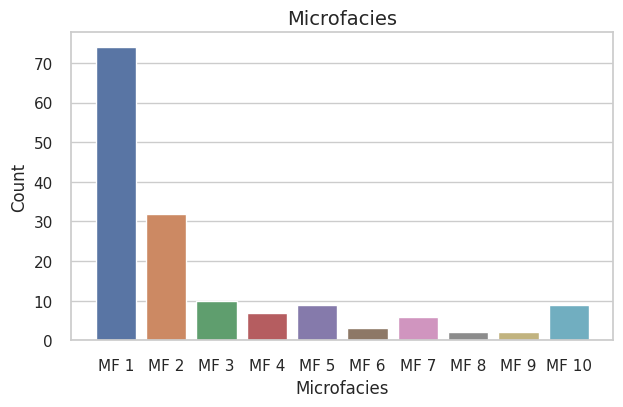

In [ ]:
sns.set_theme(style = "whitegrid")

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot()

sns.countplot(data = data,
              x    = data['Microfacies'],
              order = ('MF 1', 'MF 2', 'MF 3', 'MF 4', 'MF 5', 'MF 6', 'MF 7', 'MF 8', 'MF 9', 'MF 10' ))

ax.set_xlabel('Microfacies')
ax.set_ylabel("Count")
ax.set_title('Microfacies', fontdict = {'fontsize': 14})
ax.margins(0.05)           # Default margin is 0.05, value 0 means fit

plt.show()

### Petrophysical Property Distribution

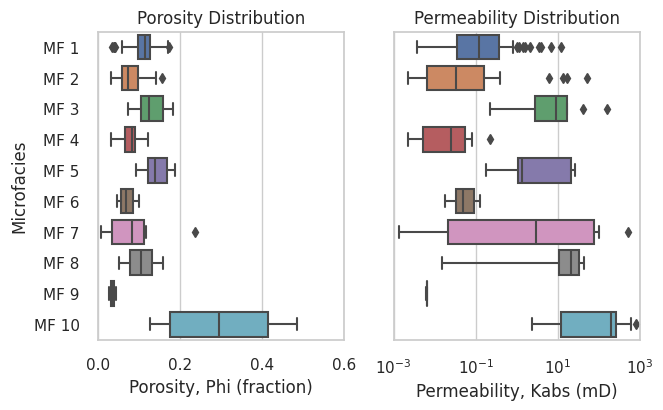

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style = "whitegrid")

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(121)

g = sns.boxplot(
    data = data,
    x = "Phi (fraction)",
    y = "Microfacies",
    order = ('MF 1', 'MF 2', 'MF 3', 'MF 4', 'MF 5', 'MF 6', 'MF 7', 'MF 8', 'MF 9', 'MF 10'),
    orient = 'h')
g.set(title='Porosity Distribution',
      xlabel="Porosity, Phi (fraction)",
      ylabel='Microfacies',
      xlim=(0,0.6))
ax.margins(0.05)    

bx = fig.add_subplot(122)

g = sns.boxplot(
    data = data,
    x = "Kabs(mD)",
    y = "Microfacies",
    order = ('MF 1', 'MF 2', 'MF 3', 'MF 4', 'MF 5', 'MF 6', 'MF 7', 'MF 8', 'MF 9', 'MF 10'),
    orient = 'h')
g.set(title='Permeability Distribution',
      xlabel="Permeability, Kabs (mD)",
      ylabel=None, yticks=(),
      xlim=(0.001,1000), xscale='log')
bx.margins(0.05)           # Default margin is 0.05, value 0 means fit
plt.show()

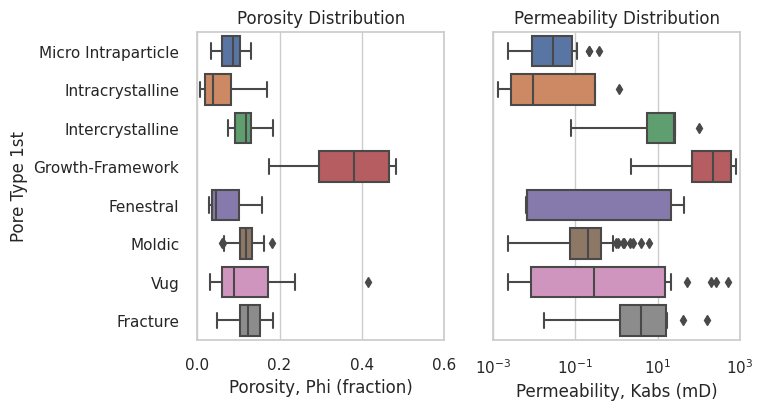

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style = "whitegrid")

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(121)

g = sns.boxplot(
    data = data,
    x = "Phi (fraction)",
    y = "Pore Type 1st",
    order = ('Micro Intraparticle','Intracrystalline', 'Intercrystalline', 'Growth-Framework','Fenestral', 'Moldic', 'Vug', 'Fracture'),
    orient = 'h')
g.set(title='Porosity Distribution',
      xlabel="Porosity, Phi (fraction)",
      ylabel="Pore Type 1st",
      xlim=(0,0.6))
ax.margins(0.4)    

bx = fig.add_subplot(122)

g = sns.boxplot(
    data = data,
    x = "Kabs(mD)",
    y = "Pore Type 1st",
    order = ('Micro Intraparticle','Intracrystalline', 'Intercrystalline', 'Growth-Framework','Fenestral', 'Moldic', 'Vug', 'Fracture'),
    orient = 'h')
g.set(title='Permeability Distribution',
      xlabel="Permeability, Kabs (mD)",
      ylabel=None, yticks=(),
      xlim=(0.001,1000), xscale='log')
bx.margins(0)           # Default margin is 0.05, value 0 means fit
plt.show()

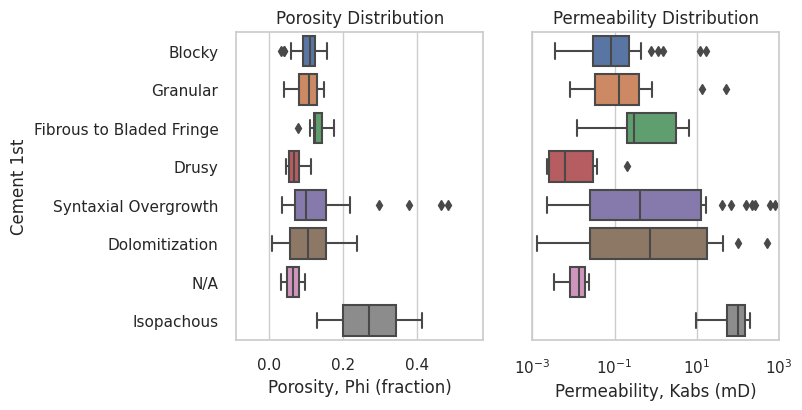

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style = "whitegrid")

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(121)

g = sns.boxplot(
    data = data,
    x = "Phi (fraction)",
    y = "Cement 1st",
    orient = 'h')
g.set(title = 'Porosity Distribution',
      xlabel = "Porosity, Phi (fraction)",
      ylabel = "Cement 1st")
ax.margins(0.2)    

bx = fig.add_subplot(122)

g = sns.boxplot(
    data = data,
    x = "Kabs(mD)",
    y = "Cement 1st",
    orient = 'h')
g.set(title = 'Permeability Distribution',
      xlabel = "Permeability, Kabs (mD)",
      ylabel=None, yticks=(),
      xlim=(0.001,1000), xscale='log')
bx.margins(0.1)           # Default margin is 0.05, value 0 means fit

plt.show()

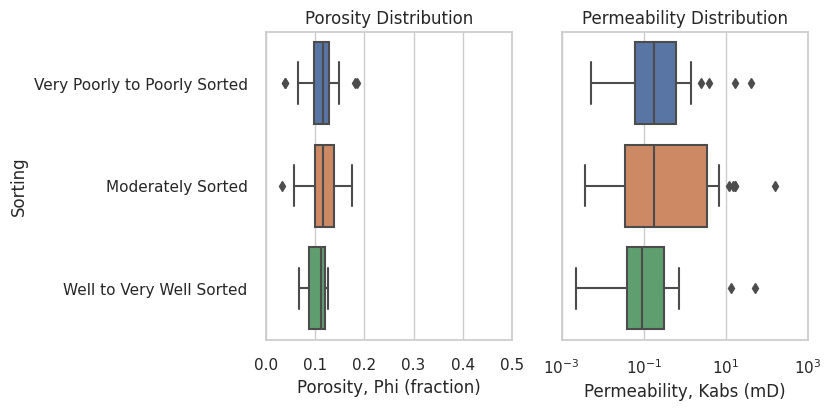

In [ ]:
# Plot Porosity and Permeability with petrographic features

sns.set_theme(style = "whitegrid")

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(121)
g = sns.boxplot(
    data = data,
    x = "Phi (fraction)",
    y = "Sorting",
    order = ('Very Poorly to Poorly Sorted', 'Moderately Sorted', 'Well to Very Well Sorted'),
    orient = 'h')
g.set(title='Porosity Distribution',
      xlabel="Porosity, Phi (fraction)",
      ylabel="Sorting",
      xlim=(0,0.5))
ax.margins(0.2)    

bx = fig.add_subplot(122)

h = sns.boxplot(
    data = data,
    x = "Kabs(mD)",
    y = "Sorting",
    order = ('Very Poorly to Poorly Sorted', 'Moderately Sorted', 'Well to Very Well Sorted'),
    orient = 'h')
h.set(title='Permeability Distribution',
      xlabel="Permeability, Kabs (mD)",
      ylabel=None, yticks=(),
      xlim=(0.001,1000), xscale='log')
bx.margins(0.1)           # Default margin is 0.05, value 0 means fit

### Petrophysical Property Relationship

<Figure size 700x400 with 0 Axes>

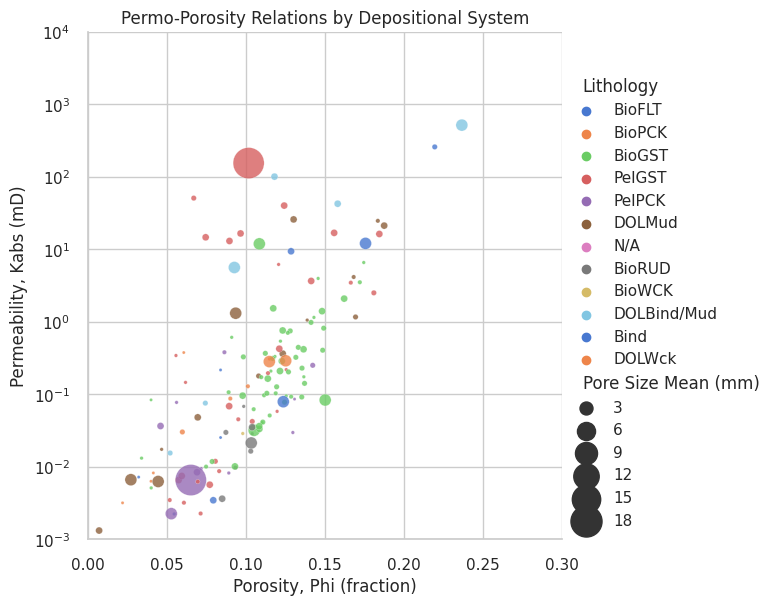

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(7,4))

g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = 'Lithology', size = 'Pore Size Mean (mm)',
    sizes=(5, 500), alpha=.8, 
    palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Depositional System',
      xlabel='Porosity, Phi (fraction)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.3),ylim=(0.001, 10000))

plt.show()

<Figure size 700x400 with 0 Axes>

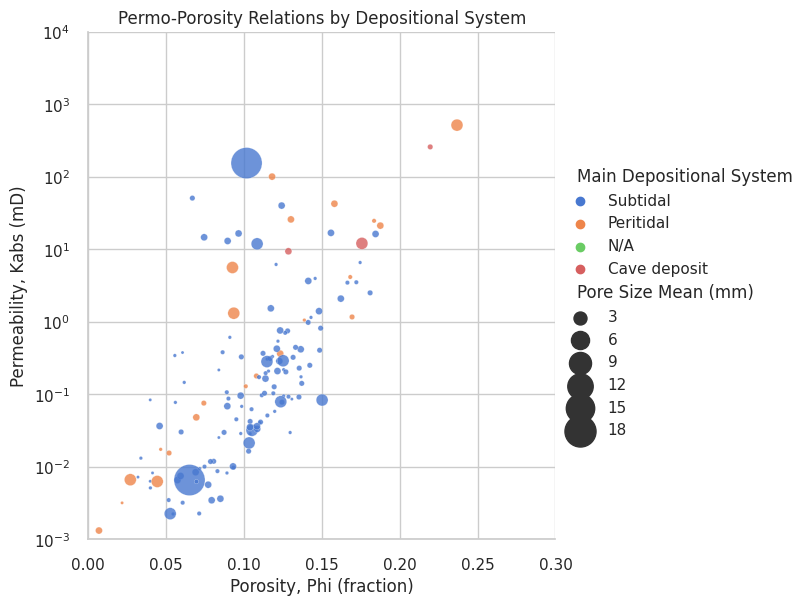

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(7,4))

g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = 'Main Depositional System', size = "Pore Size Mean (mm)",
    sizes=(5, 500), alpha=.8, 
    palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Depositional System',
      xlabel='Porosity, Phi (fraction)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.3),ylim=(0.001, 10000))

plt.show()

<Figure size 700x400 with 0 Axes>

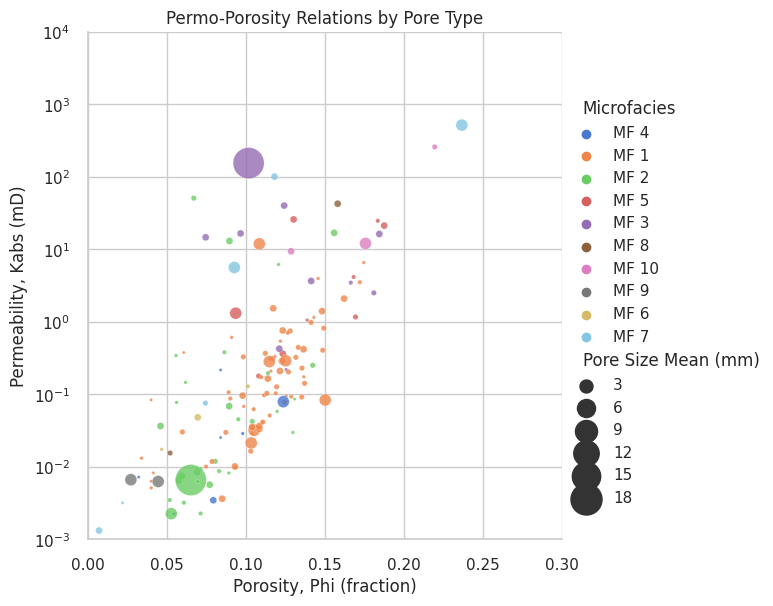

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(7,4))
g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = "Microfacies", size = "Pore Size Mean (mm)",
    sizes=(5, 500), alpha=.8, 
    palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Pore Type',
      xlabel='Porosity, Phi (fraction)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.30),ylim=(0.001, 10000))
plt.show()

<Figure size 700x400 with 0 Axes>

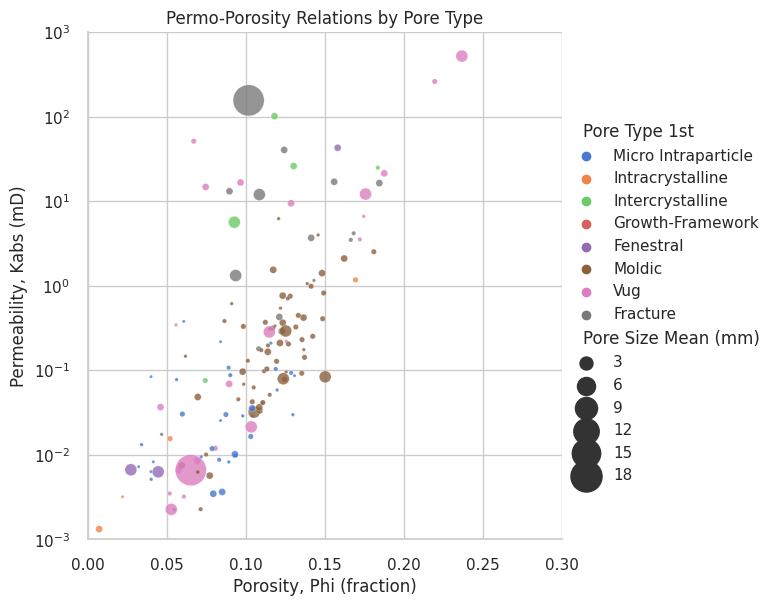

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(7,4))

g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = "Pore Type 1st", size = "Pore Size Mean (mm)",
    hue_order = ('Micro Intraparticle','Intracrystalline', 'Intercrystalline', 'Growth-Framework','Fenestral', 'Moldic', 'Vug', 'Fracture'),
    sizes=(5, 500), alpha=.8, 
    palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Pore Type',
      xlabel='Porosity, Phi (fraction)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.3),ylim=(0.001, 1000))
plt.show()

<Figure size 700x400 with 0 Axes>

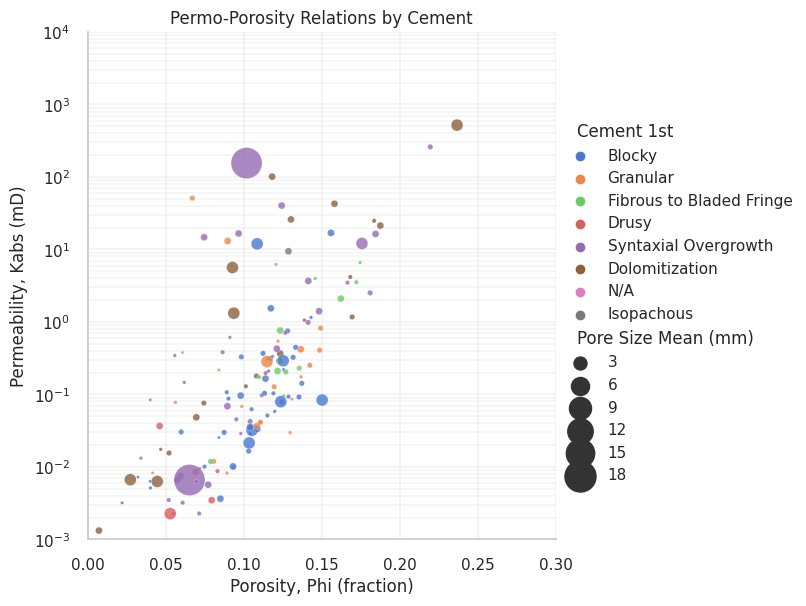

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(7,4))
g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = "Cement 1st", size = "Pore Size Mean (mm)",
    sizes=(5, 500), alpha=.8, 
    palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Cement',
      xlabel='Porosity, Phi (fraction)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.30),ylim=(0.001, 10000))

g.ax.xaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'minor', linewidth=0.25)
plt.show()

<Figure size 700x400 with 0 Axes>

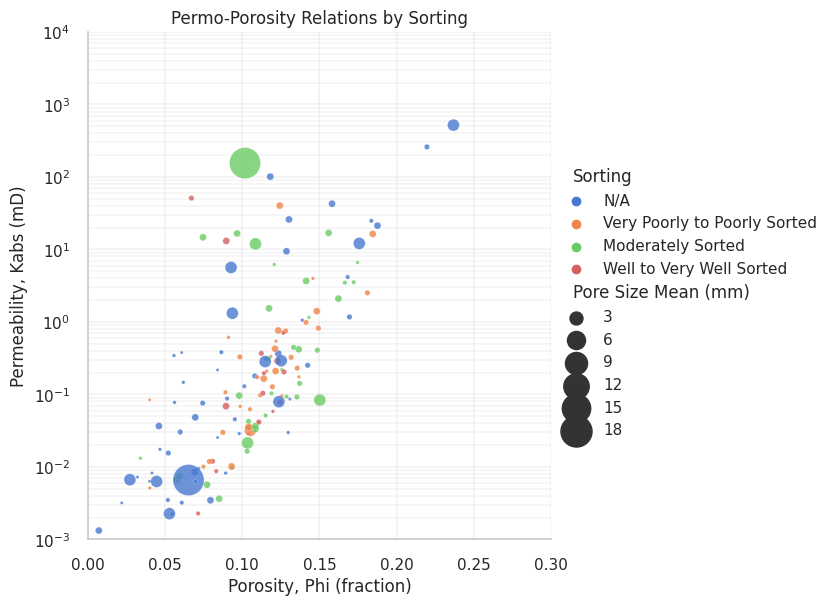

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(7,4))
g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = "Sorting", size = "Pore Size Mean (mm)",
    sizes=(5, 500), alpha=.8, 
    palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Sorting',
      xlabel='Porosity, Phi (fraction)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.30),ylim=(0.001, 10000))

g.ax.xaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'minor', linewidth=0.25)
plt.show()

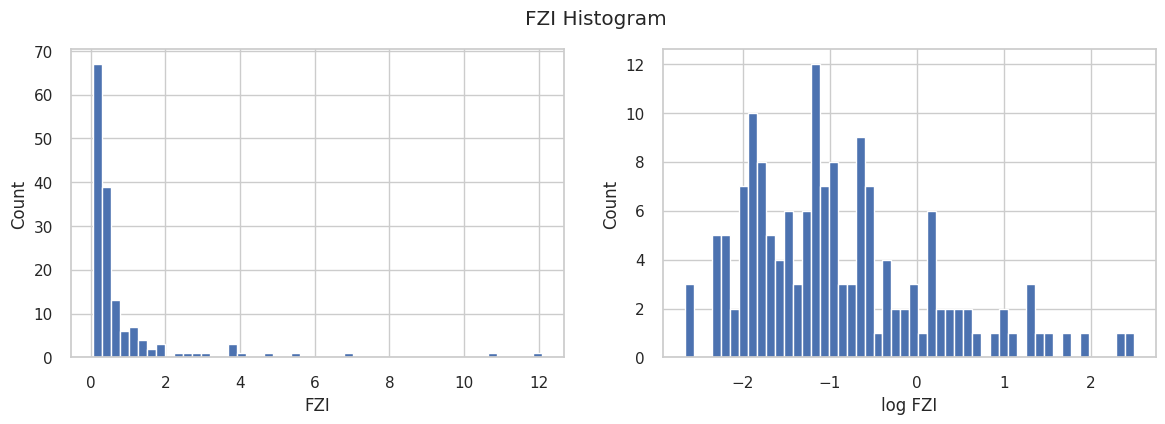

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].hist(data['FZI'], bins=50)
axs[0].set(xlabel='FZI', ylabel='Count')
axs[1].hist(np.log(data['FZI']), bins=50)
axs[1].set(xlabel='log FZI', ylabel='Count')
fig.suptitle('FZI Histogram')
plt.show()

<Figure size 700x400 with 0 Axes>

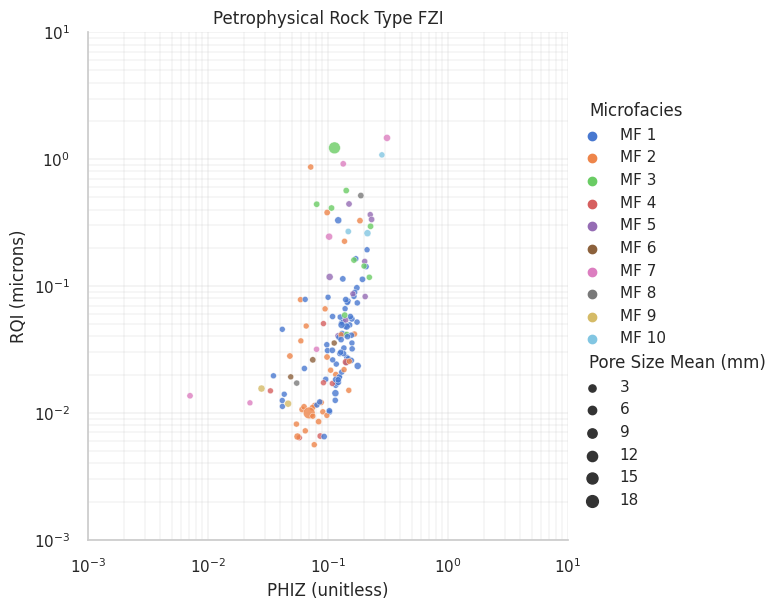

In [ ]:
# Plot Porosity and Permeability with petrographic features
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(7,4))

g = sns.relplot(
    data = data,
    x = "PHIZ", y = "RQI", 
    hue = "Microfacies", size = "Pore Size Mean (mm)",
    hue_order = ('MF 1', 'MF 2', 'MF 3', 'MF 4', 'MF 5', 'MF 6', 'MF 7', 'MF 8', 'MF 9', 'MF 10'),
    alpha=.8, palette="muted", height=6)
g.set(title  = 'Petrophysical Rock Type FZI',
      xlabel = 'PHIZ (unitless)', ylabel = 'RQI (microns)',
      xscale = 'log', yscale='log',
      xlim = (0.001,10), ylim = (0.001, 10)
      )

g.ax.xaxis.grid(True, 'major', linewidth=0.3)
g.ax.xaxis.grid(True, 'minor', linewidth=0.25)
g.ax.yaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'minor', linewidth=0.25)

plt.show()

<Figure size 700x400 with 0 Axes>

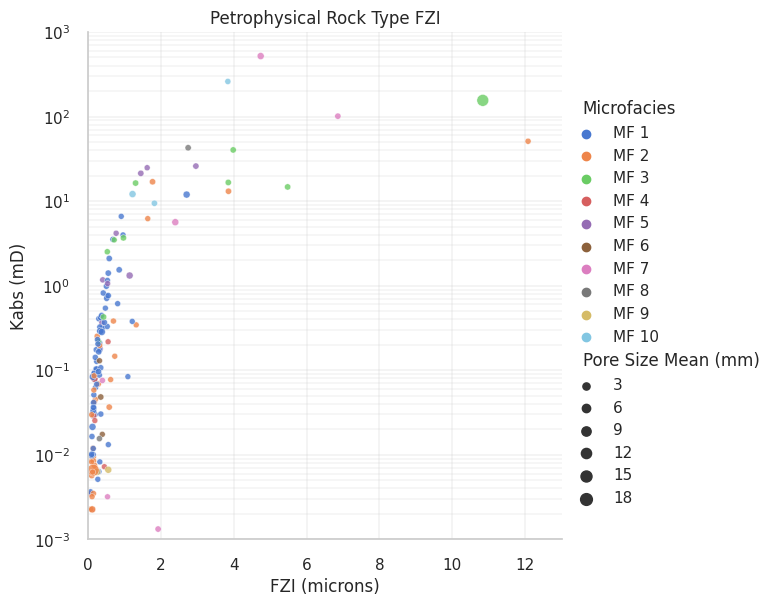

In [ ]:
# Plot Porosity and Permeability with petrographic features

sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(7,4))

g = sns.relplot(
    data = data,
    x = 'FZI', y = "Kabs(mD)", 
    hue = "Microfacies", size = "Pore Size Mean (mm)",
    hue_order = ('MF 1', 'MF 2', 'MF 3', 'MF 4', 'MF 5', 'MF 6', 'MF 7', 'MF 8', 'MF 9', 'MF 10'),
    alpha=.8, palette="muted", height=6)
g.set(title  = 'Petrophysical Rock Type FZI',
      xlabel = 'FZI (microns)', ylabel = 'Kabs (mD)',
      xscale = 'linear', yscale='log',
      xlim=(0, 13), ylim=(0.001,1000) 
      )

g.ax.xaxis.grid(True, 'major', linewidth=0.3)
g.ax.xaxis.grid(True, 'minor', linewidth=0.25)
g.ax.yaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'minor', linewidth=0.25)

plt.show()

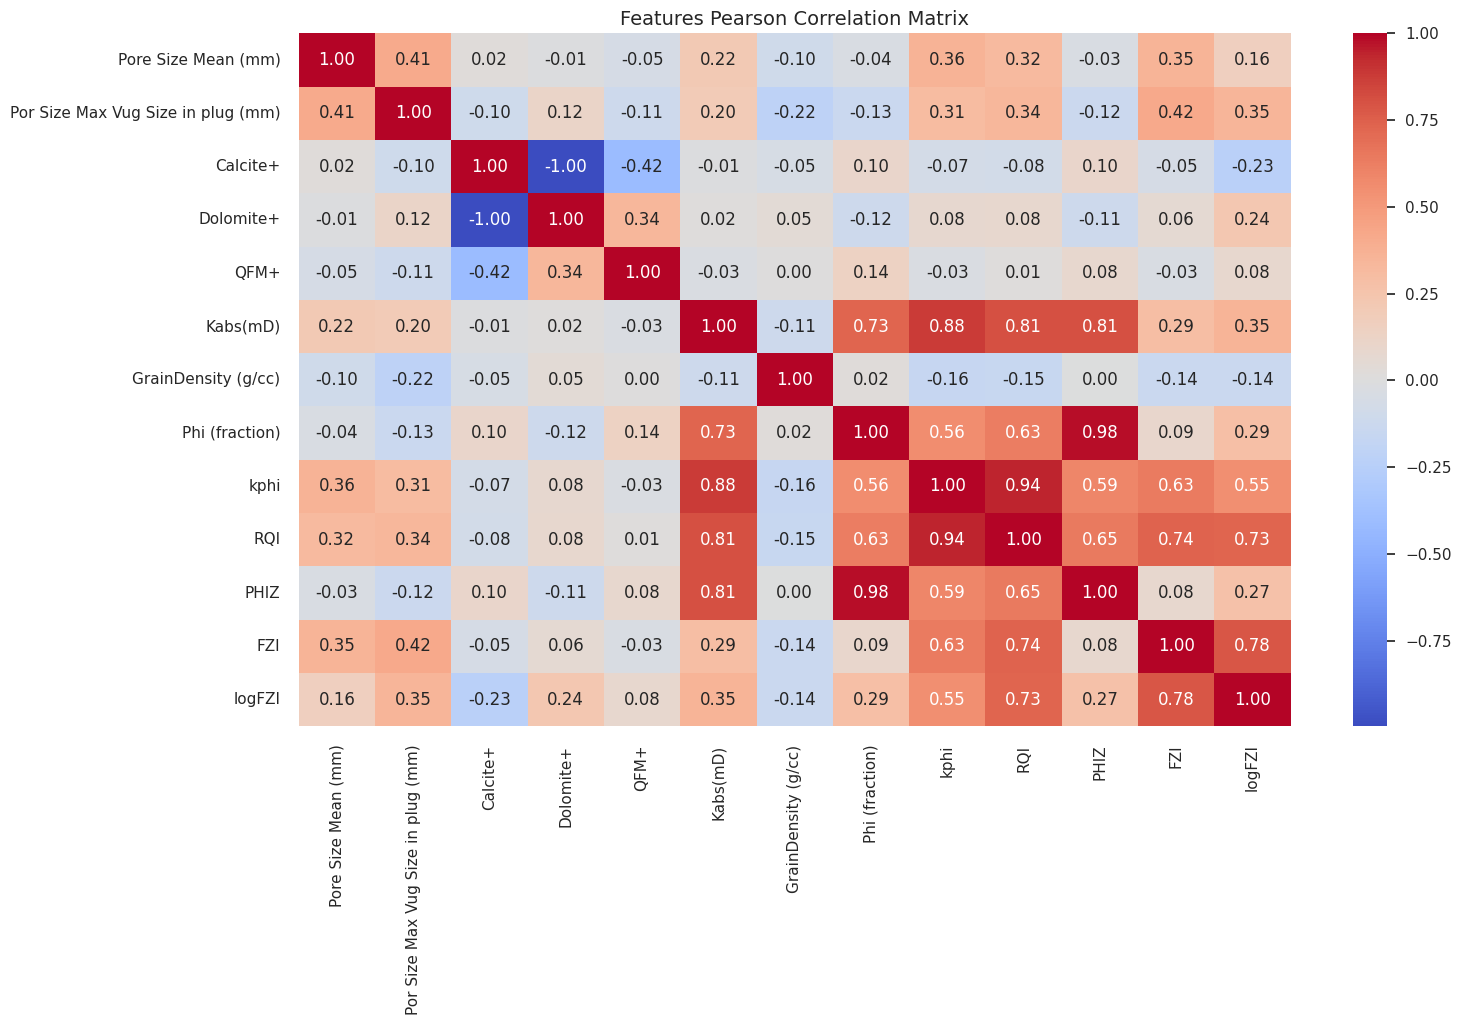

In [ ]:
# Matriz de correlacao Linearidade

correlation_Pearson = data.corr(method='pearson',
                        min_periods=1,
                        numeric_only=True)

f_corr = plt.figure(figsize=(16,9))
sns.heatmap(correlation_Pearson,
            annot = True,
            fmt = '.2f',
            cmap = 'coolwarm')
plt.title("Features Pearson Correlation Matrix", fontdict = {'fontsize': 14})
plt.show()

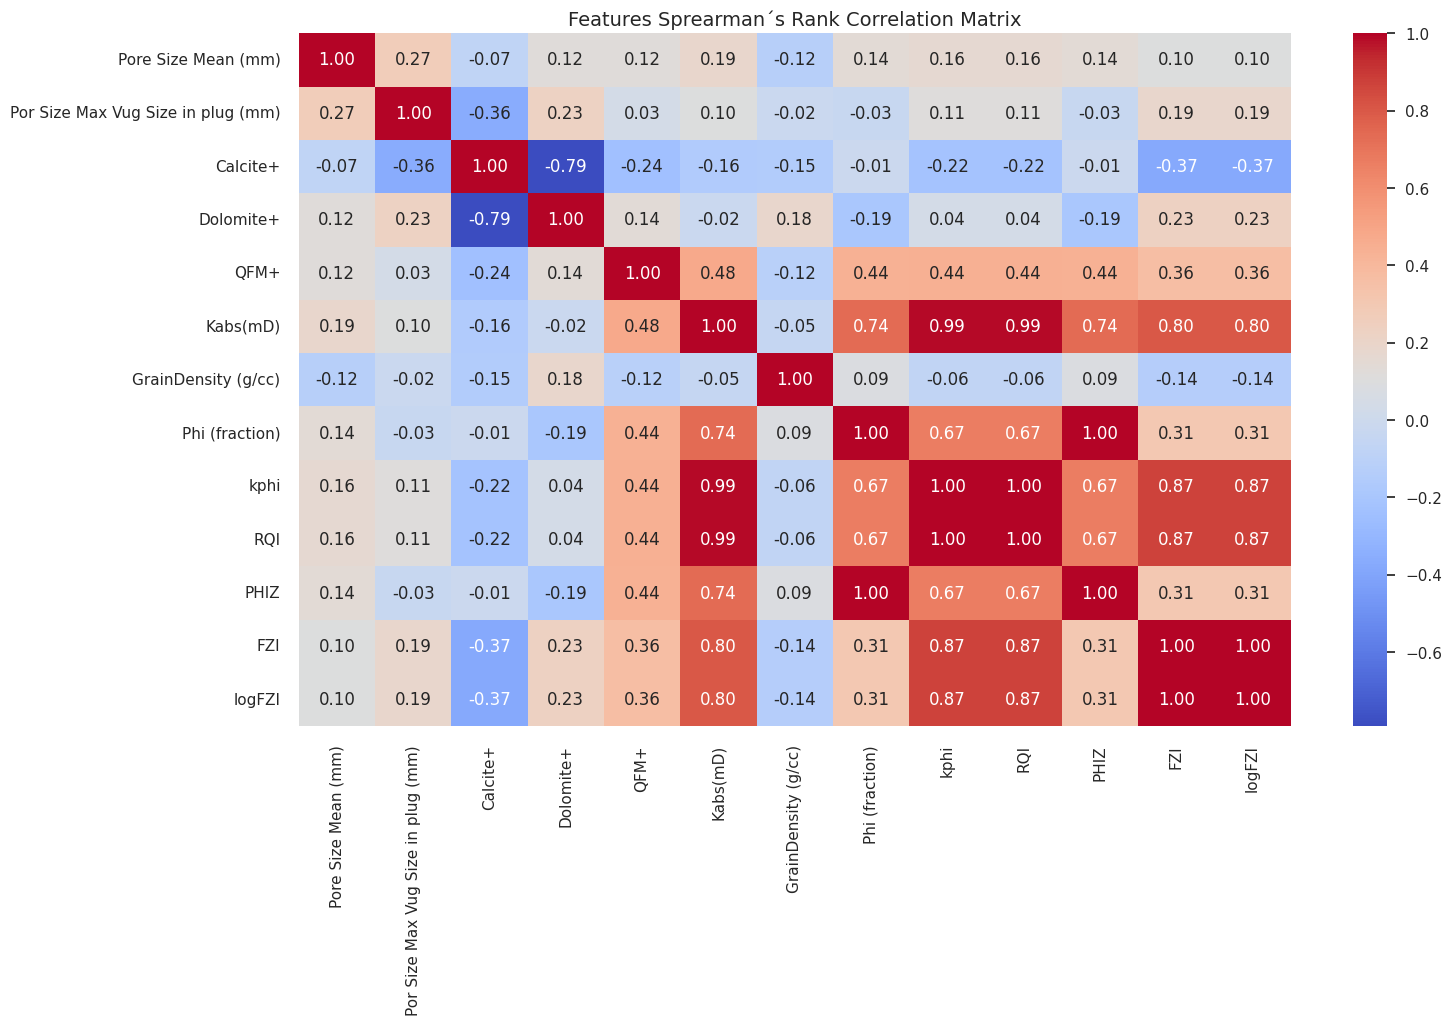

In [ ]:
# Matriz de correlacao para relações não lineares

correlation_Spear = data.corr(method='spearman',
                        min_periods=1,
                        numeric_only=True)

f_corr = plt.figure(figsize=(16,9))
sns.heatmap(correlation_Spear,
            annot = True,
            fmt = '.2f',
            cmap = 'coolwarm')
plt.title("Features Sprearman´s Rank Correlation Matrix", fontdict = {'fontsize': 14})
plt.show()

----------------------------------------------------------

# Part 4 - Inference


[Scikit-learn (1.2.2)](https://scikit-learn.org/)


@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

## Setup

In [ ]:
# Libraries for data loading and manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
import random
seed = 1
random.seed(seed)
np.random.seed(seed)

# 4.1. **Petrophysical Rock-type clustering**

### Features Setup

In [ ]:
data.columns

Index(['Sample', 'Lithology', 'Depositional System',
       'GrainSize / Crystallinity', 'Sorting', 'Pore Type 1st', 'Cement 1st',
       'Main Diagenetic Environment', 'Pore Size', 'Pore Size Mean (mm)',
       'Por Size Max Vug Size in plug (mm)', 'Microfacies', 'Calcite+',
       'Dolomite+', 'QFM+', 'Kabs(mD)', 'GrainDensity (g/cc)',
       'Main Depositional System', 'Phi (fraction)', 'kphi', 'RQI', 'PHIZ',
       'FZI', 'logFZI'],
      dtype='object')

In [ ]:
reference = ['Sample']

label = "Microfacies"

categorical_columns = [
    
     ]

numerical_linear = [
    'Calcite+', 'Dolomite+', 'QFM+',
    'GrainDensity (g/cc)', 'Phi (fraction)'
]

numerical_nonlinear = [
    'Kabs(mD)', 'FZI'
]

subset_feature = reference + categorical_columns + numerical_linear + numerical_nonlinear

y = pd.DataFrame( {"Sample": data["Sample"],
                   "Label": data[label] }).set_index('Sample')

# Entrada (todas as colunas menos o rotulo)
X = data[subset_feature].loc[:,data[subset_feature].columns != label].set_index('Sample')
X_features = X.columns
print("X features: ", X_features)
print("\n")
print('Y label: ', y['Label'].unique())
print("\n")
print("X : ", X.shape, type(X))
print("y : ", y.shape, type(y))

X features:  Index(['Calcite+', 'Dolomite+', 'QFM+', 'GrainDensity (g/cc)',
       'Phi (fraction)', 'Kabs(mD)', 'FZI'],
      dtype='object')


Y label:  ['MF 4' 'MF 1' 'MF 2' 'MF 5' 'MF 3' 'MF 8' 'MF 10' 'MF 9' 'MF 6' 'MF 7']


X :  (154, 7) <class 'pandas.core.frame.DataFrame'>
y :  (154, 1) <class 'pandas.core.frame.DataFrame'>


## Preprocessing

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer,  StandardScaler


categorical_preprocessor = Pipeline(
    steps=[
        ("imputation_constant",
          SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = -1),
        ),
        ("ordinal_encoder", 
         OrdinalEncoder(dtype = int)),
    ]
)


numerical_linear_preprocessor = Pipeline(
    steps=[
        ("imputation_moda",
         SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("scaler",
         StandardScaler()),
    ]
)

numerical_nonlinear_preprocessor = Pipeline(
    steps=[
        ("imputation_mean",
         SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("powerTransforme",
         PowerTransformer(method='box-cox', standardize=False)),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_columns),
        ("numerical linear", numerical_linear_preprocessor, numerical_linear),
        ("numerical_nonlinear", numerical_nonlinear_preprocessor, numerical_nonlinear )
    ]
)

pipe = make_pipeline(preprocessor)
pipe.fit(X)
X_preproc = pipe.transform(X)#.toarray()

# Encoding Label
encoding_label = LabelEncoder()
encoding_label.fit(np.array(y['Label']))
y_encoded = encoding_label.transform(np.array(y).ravel())
print("y encoded shape :", y_encoded.shape)

label_classes = list(encoding_label.classes_)
print("Label : ", label_classes)

y encoded shape : (154,)
Label :  ['MF 1', 'MF 10', 'MF 2', 'MF 3', 'MF 4', 'MF 5', 'MF 6', 'MF 7', 'MF 8', 'MF 9']


## Clustering

In [ ]:
## KMEANS CLUSTERING

# best numeber of cluster
def Kmeans_ncluster_optimizer(dataframe):
  
  #importacao das bibliotecas
  from sklearn.cluster import KMeans
  from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
  from yellowbrick.cluster import KElbowVisualizer
  import matplotlib.pyplot as plt

  # Seed para reprodução de resultados
  import random
  seedX = 1
  random.seed(seedX)
  np.random.seed(seedX)

  # Perfomance Metrics
  wcss = [] # inertia_ : Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
  silhouette = []
  calinski_harabasz = []
  davies_bouldin = []

  K = range(2,20)
  for k in K:
    kmodel = KMeans(n_clusters=k,
                    init = 'k-means++',
                    n_init = 'auto',
                    max_iter = 500,
                    tol = 0.001,
                    random_state=seed,
                    algorithm = 'lloyd')
    kmodel.fit(dataframe)

    wcss.append(kmodel.inertia_)
    silhouette.append(silhouette_score(dataframe, kmodel.labels_, metric="euclidean"))
    calinski_harabasz.append(calinski_harabasz_score(dataframe, kmodel.labels_))
    davies_bouldin.append(davies_bouldin_score(dataframe, kmodel.labels_))


  f, axs = plt.subplots(4,1, figsize=(5,7), sharex=True)
  f.suptitle('N Cluster Optimizer')

  axs[0].set_title("Weighted cluster´s Centers Sum of Square distances")
  axs[0].plot(K, wcss, 'ko--', label='WCSS')
  axs[0].set_ylabel('WCSS')

  axs[1].set_title("Calinski-Harabasz Index (1974)")
  axs[1].plot(K, calinski_harabasz, 'r*--', label='Calinski-Harabasz Index')
  axs[1].set_ylabel('CH Index')  # we already handled the x-label with ax1

  axs[2].set_title("Davies-Bouldin Index (1979)")
  axs[2].plot(K, davies_bouldin, 'bo--', label='Davies-Bouldin Index')
  axs[2].set_ylabel('DB Index')  # we already handled the x-label with ax1

  axs[3].set_title("Rousseeuw´s Silhouette Coefficient (1987)")
  axs[3].plot(K, silhouette, 'gx--', label='Silhouette Coefficient')
  axs[3].set_ylabel('Coefficient')  # we already handled the x-label with ax1

  axs[3].set_xlabel('N Cluster')
  axs[3].set_xticks([0,2,4,6,8,10,12,14,16,18,20])

  f.tight_layout()
  plt.show()

  g = plt.figure(figsize=(7,5))
  visualizer = KElbowVisualizer(kmodel, k=(2,20))
  visualizer.fit(dataframe) 
  visualizer.poof()
  plt.show()

# HIERARCHICAL CLUSTERING

def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# CLUSTERING PERFORMANCE
# Comparing machine learning cluster against geologist's concept

def geologist_x_machine(model, y):
  from sklearn import metrics

  labels_true      = y
  labels_predicted = model.labels_

  metrics_rand_index   = metrics.rand_score(labels_true, labels_predicted)
  metrics_homogeneity  = metrics.homogeneity_score(labels_true, labels_predicted)
  metrics_completeness = metrics.completeness_score(labels_true, labels_predicted)
  metrics_v_measure    = metrics.v_measure_score(labels_true, labels_predicted)
  
  print("Model >>> ", model)
  print("Metrics")
  print("Rand Index         : ", metrics_rand_index)
  print("Homogeneity Score  : ", metrics_homogeneity)
  print("Completeness Score : ", metrics_completeness)
  print("V Measure Score    : ", metrics_v_measure)
  
  import seaborn as sns

  sns.set_theme(style = "whitegrid")

  f = plt.figure()
  sns.despine(f, left=True, bottom=True)
  
  sns.jointplot(x = y,
                y = model.labels_,
                kind  = "hex",
                color = "#4CB391")
  
  plt.xlim(min(y)-1, max(y)+1 )
  plt.ylim(min( model.labels_)-1, max( model.labels_)+1 )

  plt.xlabel('Geologist´s Concept')
  plt.ylabel('Machine Learning Cluster')

  plt.show()

### KMeans

_Search for best number of clusters_

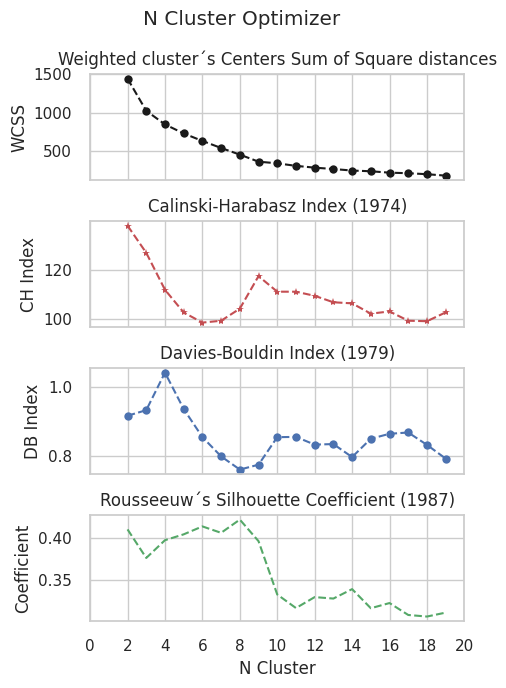

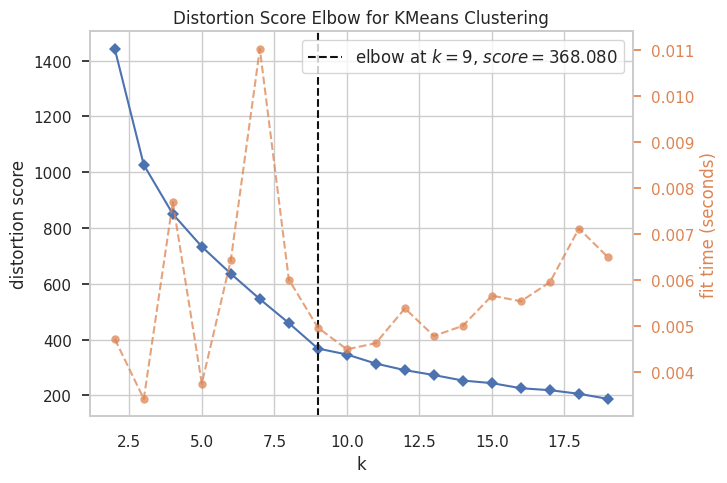

In [ ]:
Kmeans_ncluster_optimizer(X_preproc)

№6. Calinski-Harabasz Index
Calinski-Harabasz Index measures the between-cluster dispersion against within-cluster dispersion. A higher score signifies better-defined clusters.

The Calinski-Harabasz Index, or Variance Ratio Criterion, measures the sum of between-cluster dispersion against the sum of within-cluster dispersion, where dispersion is the sum of distance squared.

A higher ratio signifies the cluster is far away from its other clusters and that the cluster is more well-defined. The formula is found in this article’s Appendix (Fig 9).

When to use Calinski-Harabasz Index
You want efficiency: The Calinski-Harabasz Index is fast to compute
You define good clusters as well-defined clusters: Calinski-Harabasz Index follows the general definition of good clusters being dense and well-separated.
When to NOT use Calinski-Harabasz Index
You are comparing different types of clustering algorithms: Calinski-Harabasz Index tends to be higher for density-based clustering algorithms, and would be unfair to compare against other types of clustering algorithms.

№7. Davies-Bouldin Index
Davies-Bouldin Index measures the size of clusters against the average distance between clusters. A lower score signifies better-defined clusters.

The Davies-Bouldin Index measures the average similarity between clusters, where similarity compares the size of clusters against the between-cluster distance.

A lower score means that the cluster is relatively small compared to the distance to another cluster, hence well-defined. The formula is found in this article’s Appendix (Fig 10).

When to use Davies-Bouldin Index
You want interpretability: Davies-Bouldin Index is easier to compute than Silhouette scores and it uses point-wise distances.
When to NOT use Davies-Bouldin Index
You are comparing different types of clustering algorithms: Davies-Bouldin Index tends to be higher for density-based clustering, and would be unfair to compare against other types of clustering algorithms.
You want other distance measures besides Euclidean distance: Size of clusters, computed by centroid distance, limits distance metric to Euclidean space.

When to use Silhouette Coefficient
You want interpretability: The Silhouette Coefficient is intuitive and easy to understand.
You want a basis for comparison: Silhouette Coefficient has a range of [-1, 1], from incorrect clustering to highly dense clustering, with 0 being overlapping clusters. The bounded range makes it easy to compare the scores between different algorithms.
You define good clusters as well-defined clusters: Silhouette Coefficient follows the general definition of good clusters being dense and well-separated.
When to NOT use Silhouette Coefficient
You are comparing different types of clustering algorithms: Silhouette Coefficient scores tend to be higher for density-based clustering algorithms, and would be unfair to compare against other types of clustering algorithms.
https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2

_Modeling_

In [ ]:
from sklearn.cluster import KMeans

model_cluster_kmeans = KMeans(n_clusters = 10,
                              init = 'random',
                              n_init = 50,
                              max_iter = 500,
                              tol = 0.001,
                              random_state = seed,
                              algorithm = 'lloyd')
model_cluster_kmeans = model_cluster_kmeans.fit(X_preproc)

# Grupos de cada registro da base
kmeans_labels = model_cluster_kmeans.labels_
data['PRT Kmeans'] = kmeans_labels

_Results_

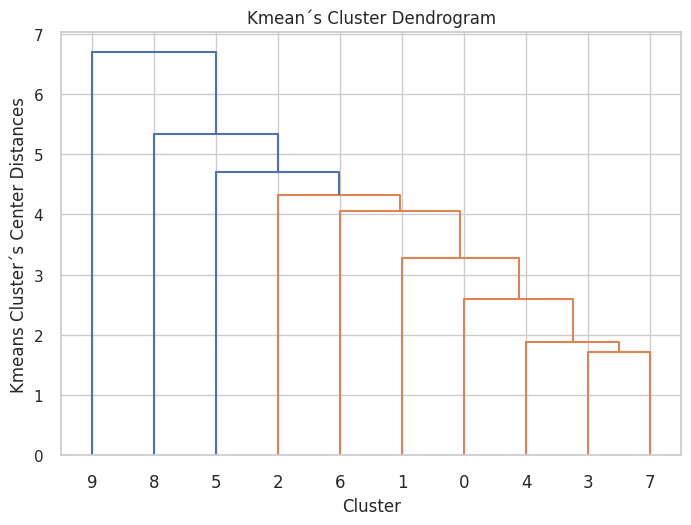

,Calcite+,Dolomite+,QFM+,GrainDensity (g/cc),Phi (fraction),Kabs(mD),FZI
0,0.388091,-0.382486,-0.234950,-0.161044,-0.740262,-6.761380,-2.836096
1,0.299667,-0.306412,0.012273,-0.367204,0.276040,1.817483,0.350541
2,0.364338,-0.385272,0.192156,-0.264609,3.850697,4.252456,0.317747
3,0.385912,-0.385010,-0.246553,0.174054,-0.126022,-2.714112,-1.778879
4,0.385088,-0.383717,-0.219841,0.482638,0.026106,-1.038637,-0.980732
5,-2.536430,2.656875,-0.249284,0.253041,-1.072857,-6.121269,-0.922745
6,-2.411528,2.439227,0.754368,0.229006,0.611071,2.507050,0.551129
7,0.388323,-0.380943,-0.241344,0.228431,-0.257046,-4.252112,-2.533610
8,-0.419841,0.461500,-0.249284,-4.980263,-0.471318,-2.790669,-1.120914
9,-2.756843,2.324170,6.213326,0.056365,0.264339,-0.925893,-1.175570


In [ ]:
# Centróides: muito importante analisar.
# Eles nos dizem sobre o perfil de cada grupo
kmean_centers = model_cluster_kmeans.cluster_centers_

#View kmeans clusters as Dendrogram
from scipy.cluster import hierarchy

Z = hierarchy.linkage(kmean_centers, 'single')

f = plt.figure()
dn = hierarchy.dendrogram(Z)
plt.title('Kmean´s Cluster Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Kmeans Cluster´s Center Distances')

plt.show()



cluster_centroids = pd.DataFrame(kmean_centers,
                                 columns = X_features)
cluster_centroids

Model >>>  KMeans(init='random', max_iter=500, n_clusters=10, n_init=50, random_state=1,
       tol=0.001)
Metrics
Rand Index         :  0.7119938884644768
Homogeneity Score  :  0.46202885209334105
Completeness Score :  0.3700773107501908
V Measure Score    :  0.41097254823205387


<Figure size 800x550 with 0 Axes>

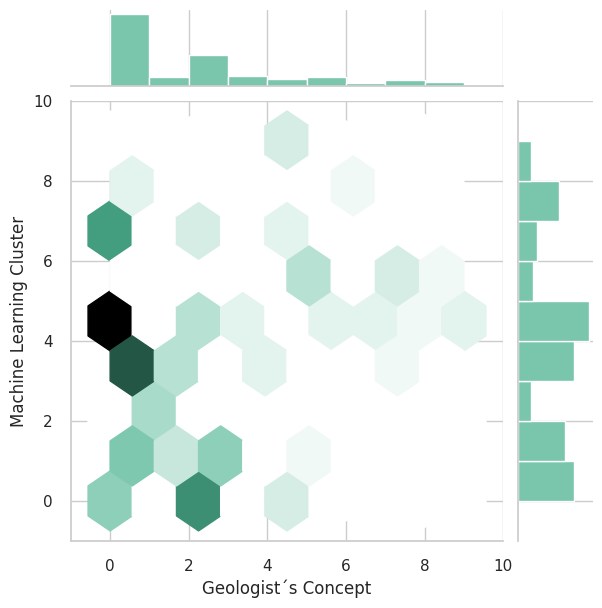

In [ ]:
geologist_x_machine(model_cluster_kmeans, y_encoded)

### _Aglomerative / Hierarchical Clustering Dendogram_

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
AgCluster_model = AgglomerativeClustering(
                                n_clusters = 10,
                                metric = None,
                                linkage = "ward",
                                compute_distances = True,
                                compute_full_tree = "auto",
                                )

AgCluster_model = AgCluster_model.fit(X_preproc)

# Grupos de cada registro da base
AgCluster_nclusters = AgCluster_model.n_clusters_
AgCluster_labels = AgCluster_model.labels_
data['PRT Khierac'] = AgCluster_labels

_Results_

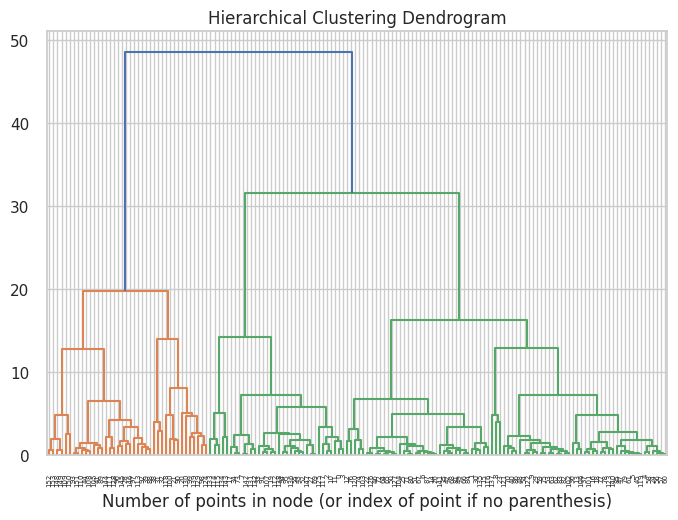

In [ ]:
f = plt.figure()

plot_dendrogram(AgCluster_model, truncate_mode="level")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")

plt.show()

Model >>>  AgglomerativeClustering(compute_distances=True, n_clusters=10)
Metrics
Rand Index         :  0.715898480604363
Homogeneity Score  :  0.4689139655365981
Completeness Score :  0.4062938733025617
V Measure Score    :  0.4353637224187165


<Figure size 800x550 with 0 Axes>

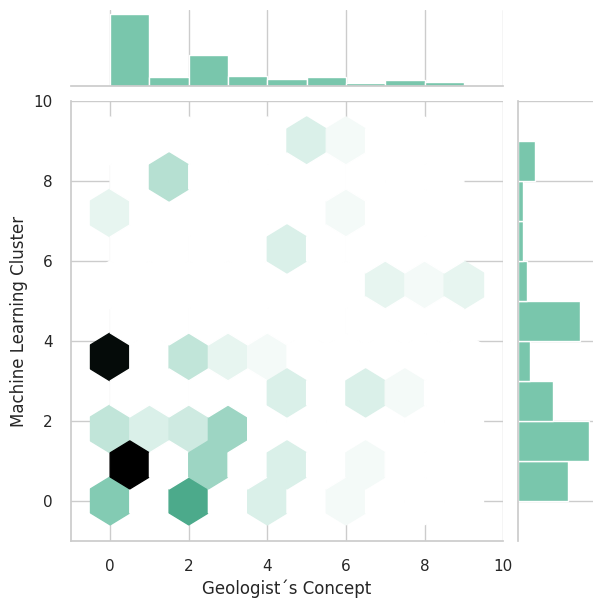

In [ ]:
geologist_x_machine(AgCluster_model, y_encoded)

## Clustering Performance Evaluation

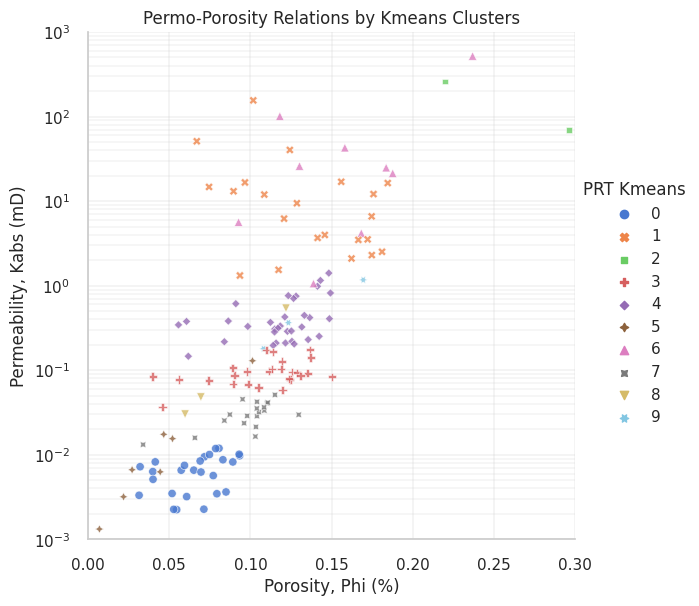

In [ ]:
sns.set_theme(style="whitegrid")

# Plot Porosity and Permeability with petrographic features

g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = "PRT Kmeans", style = "PRT Kmeans",
    alpha=.8, palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Kmeans Clusters',
      xlabel='Porosity, Phi (%)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.3),ylim=(0.001, 1000))

g.ax.xaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'minor', linewidth=0.25)


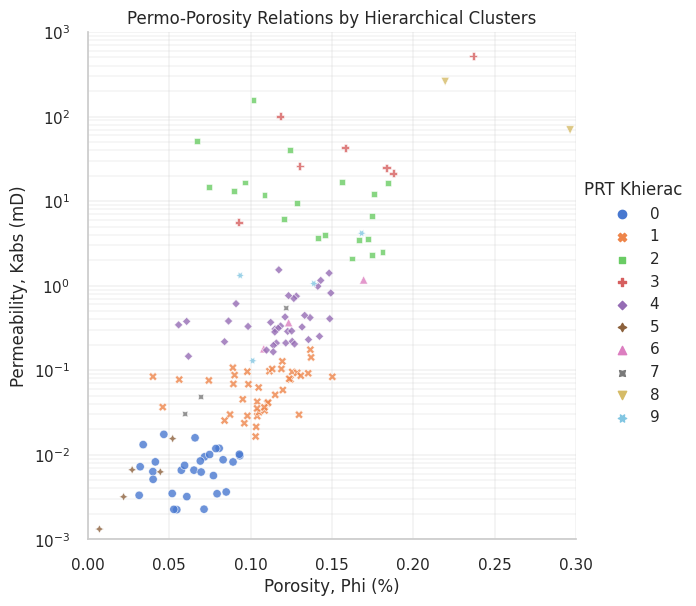

In [ ]:
sns.set_theme(style="whitegrid")

# Plot Porosity and Permeability with petrographic features

g = sns.relplot(
    data = data,
    x = "Phi (fraction)", y = "Kabs(mD)", 
    hue = "PRT Khierac", style = "PRT Khierac",
    alpha=.8, palette="muted", height=6)

g.set(title='Permo-Porosity Relations by Hierarchical Clusters',
      xlabel='Porosity, Phi (%)', ylabel='Permeability, Kabs (mD)',
      xscale='linear', yscale='log',
      xlim=(0,0.3),ylim=(0.001, 1000))

g.ax.xaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'major', linewidth=0.3)
g.ax.yaxis.grid(True, 'minor', linewidth=0.25)

# 4.2. **Microfacies classification** by petrographical description and petrophysical analysis

### Features Setup

In [ ]:
data.columns

Index(['Sample', 'Lithology', 'Depositional System',
       'GrainSize / Crystallinity', 'Sorting', 'Pore Type 1st', 'Cement 1st',
       'Main Diagenetic Environment', 'Pore Size', 'Pore Size Mean (mm)',
       'Por Size Max Vug Size in plug (mm)', 'Microfacies', 'Calcite+',
       'Dolomite+', 'QFM+', 'Kabs(mD)', 'GrainDensity (g/cc)',
       'Main Depositional System', 'Phi (fraction)', 'kphi', 'RQI', 'PHIZ',
       'FZI', 'logFZI', 'PRT Kmeans', 'PRT Khierac'],
      dtype='object')

In [ ]:
reference = ['Sample']

label = "Microfacies"

categorical_columns = [
    "Lithology", 'GrainSize / Crystallinity', 'Sorting', 'Pore Type 1st', 'Cement 1st',
    'PRT Kmeans', 'PRT Khierac'
    ]

numerical_linear = [
]

numerical_nonlinear = [
   
]

subset_feature = reference + [label] + categorical_columns + numerical_linear + numerical_nonlinear

y_class = pd.DataFrame( {"Sample": data["Sample"],
                   "Label": data[label] }).set_index('Sample')


# definir o rotulo (label)
dado = data[subset_feature].set_index('Sample')

# Entrada - todas as colunas menos o rotulo
X_class = dado.loc[:,dado.columns != label]
X_class_features = X_class.columns
# Saída - a coluna rotulo
y_class = dado[label]

print('Y label: ', y_class.unique())
print("Label null : ", y_class.isnull().sum())
print("X features: ", X_class_features)

Y label:  ['MF 4' 'MF 1' 'MF 2' 'MF 5' 'MF 3' 'MF 8' 'MF 10' 'MF 9' 'MF 6' 'MF 7']
Label null :  0
X features:  Index(['Lithology', 'GrainSize / Crystallinity', 'Sorting', 'Pore Type 1st',
       'Cement 1st', 'PRT Kmeans', 'PRT Khierac'],
      dtype='object')


### Preprocessing

_Split Train and Test dataset_

In [ ]:
# Agora usaremos a função para fazer de fato a separação.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class,
                                                    test_size=0.3)

# Vamos olhar os shapes da bases de treino e teste

print("Train X : ", X_train.shape)
print("Train y : ", y_train.shape)
print("Test X : ", X_test.shape)
print("Test y : ", y_test.shape)


Train X :  (107, 7)
Train y :  (107,)
Test X :  (47, 7)
Test y :  (47,)


_Training Data Augmentation_ 

([Imbalanced learn](https://imbalanced-learn.org/) )

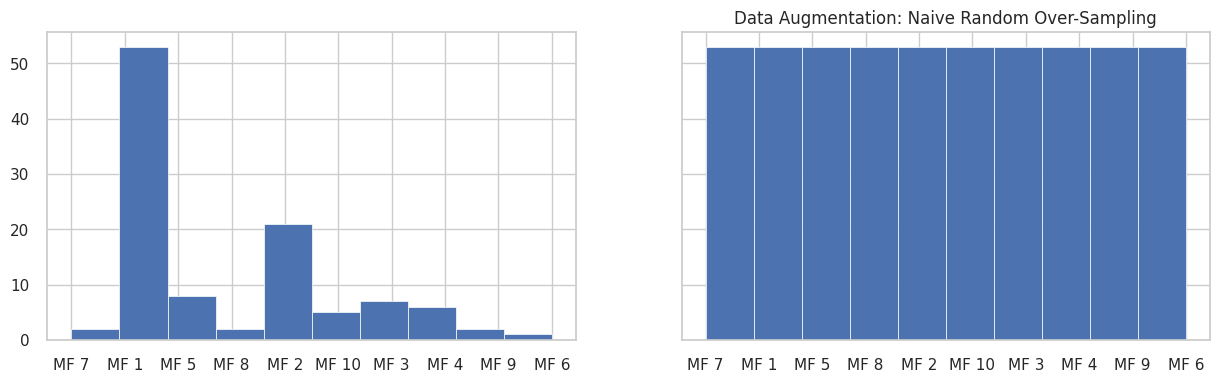

[('MF 1', 53), ('MF 10', 53), ('MF 2', 53), ('MF 3', 53), ('MF 4', 53), ('MF 5', 53), ('MF 6', 53), ('MF 7', 53), ('MF 8', 53), ('MF 9', 53)]
Train X resampled :  (530, 7)
Train y resampled:  (530,)


In [ ]:
# Naive random over-sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
axs[0].hist(y_train, bins=10, linewidth=0.5, edgecolor="white")
axs[1].hist(y_resampled, bins=10, linewidth=0.5, edgecolor="white")
plt.title('Data Augmentation: Naive Random Over-Sampling')
plt.savefig('Classification Training Data Augmentation')
plt.show()

from collections import Counter
print(sorted(Counter(y_resampled).items()))
print("Train X resampled : ", X_resampled.shape)
print("Train y resampled: ", y_resampled.shape)

_Encoding Categorical Features, Standardizaton, Non linear transformation and Imputing missing values_

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer,  StandardScaler


categorical_preprocessor = Pipeline(
    steps=[
        ("imputation_constant",
          SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = -1),
        ),
        ("ordinal_encoder", 
         OrdinalEncoder(categories='auto', dtype = int)),
    ]
)


numerical_linear_preprocessor = Pipeline(
    steps=[
        ("imputation_moda",
         SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("scaler",
         StandardScaler()),
    ]
)

numerical_nonlinear_preprocessor = Pipeline(
    steps=[
        ("imputation_mean",
         SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("powerTransforme",
         PowerTransformer(method='box-cox', standardize=False)),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_columns),
        ("numerical linear", numerical_linear_preprocessor, numerical_linear),
        ("numerical_nonlinear", numerical_nonlinear_preprocessor, numerical_nonlinear )
    ]
)

pipe = make_pipeline(preprocessor)
pipe.fit(X_resampled)
X_train_preproc = pipe.transform(X_resampled)#.toarray()
pipe.fit(X_test)
X_test_preproc = pipe.transform(X_test)#.toarray()



# Encoding Label
encoding_label = LabelEncoder()
encoding_label.fit(np.array(y_resampled)) #.reshape(-1,1)
print("Label : ", list(encoding_label.classes_))
label_classes = list(encoding_label.classes_)

y_train_preproc = encoding_label.transform(np.array(y_resampled).ravel())
y_test_preproc = encoding_label.transform(np.array(y_test).ravel())

print("Train X encoded : ", X_train.shape)
print("Train y encoded : ", y_train.shape)
print("Test X encoded  : ", X_test.shape)
print("Test y encoded  : ", y_test.shape)

Label :  ['MF 1', 'MF 10', 'MF 2', 'MF 3', 'MF 4', 'MF 5', 'MF 6', 'MF 7', 'MF 8', 'MF 9']
Train X encoded :  (107, 7)
Train y encoded :  (107,)
Test X encoded  :  (47, 7)
Test y encoded  :  (47,)


## Microfacies Classification

In [ ]:
# Functions

def class_predict_and_evaluate(model, X_test, y_test, label_classes):

  
  # inferência do teste
  y_pred = model.predict(X_test) 

  # modelo
  print(model)

  # metricas (quanto mais proximo de 1 é melhor)

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred,
                average = 'weighted')
  print('F1: ', f1)


  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  sns.set_theme(style = "whitegrid")
  
  f, ax = plt.subplots(figsize=(7,5))
  sns.heatmap(confMatrix, 
              annot=True, fmt=".0f",
              linewidths=0, linecolor='white',
              cmap='YlGn')
  
  plt.xlabel('Geologist´s Concept')
  plt.ylabel('Machine Learning')
  plt.title('Confusion Matrix')

  # Colocar os nomes
  # ax.xaxis.set_ticklabels(label_classes) 
  # ax.yaxis.set_ticklabels(label_classes)

  plt.show()

### by Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_features='auto',
                       min_impurity_decrease=0, min_samples_leaf=4,
                       min_weight_fraction_leaf=0, random_state=1)


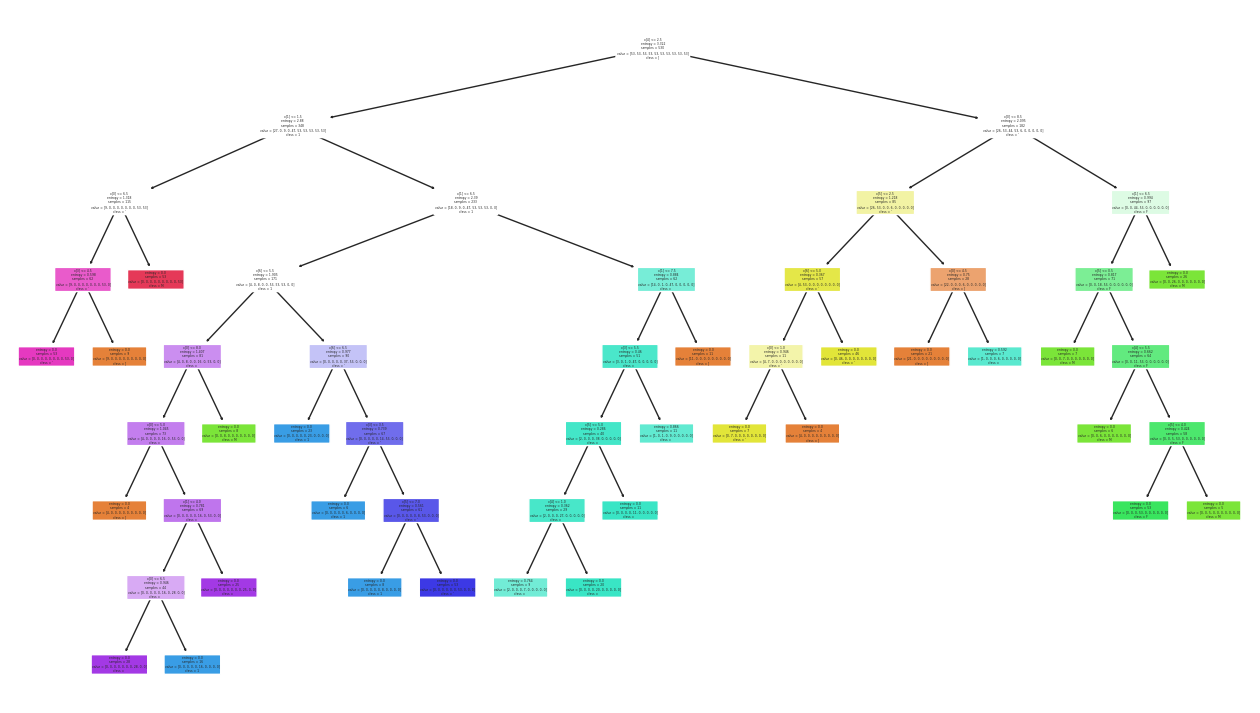

In [ ]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

# tente mudar parâmetro para evitar overfitting
model_DT = DecisionTreeClassifier(criterion = "entropy",
                                  splitter = 'best',
                                  max_depth = None,
                                  min_samples_split = 2,
                                  min_samples_leaf=4,
                                  min_weight_fraction_leaf = 0,
                                  max_features = 'auto',                                  
                                  random_state=seed,
                                  max_leaf_nodes = None,
                                  min_impurity_decrease = 0,
                                  class_weight = None,
                                  ccp_alpha = 0) 
model_DT = model_DT.fit(X_train_preproc, y_train_preproc);
print(model_DT)

# Visualização gráfica da árvore de decisão
from sklearn import tree

fig, ax = plt.subplots(figsize=(16, 9)) 

tree.plot_tree(model_DT,
               class_names = str(encoding_label.classes_),
               filled  = True,
               rounded = True)

plt.savefig('Decission_Tree_Classification.png') 
plt.show()

_Tree Structure_

In [ ]:
DP = model_DT.decision_path(X_train_preproc)
# print(DP)

_Features Selection_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Features selected by SelectFromModel: ['Lithology' 'GrainSize / Crystallinity' 'Cement 1st' 'PRT Khierac']
Done in 0.003s


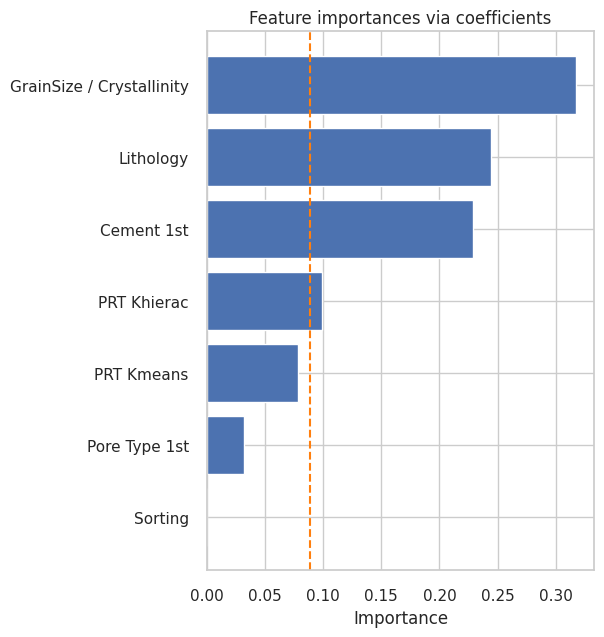

In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time

feature_names = np.array(X_class.columns)
n_features_in = model_DT.n_features_in_
importance = model_DT.feature_importances_
threshold = np.sort(importance)[-5] + 0.01

tic = time()
sfm = SelectFromModel(model_DT, threshold=threshold).fit(X_train_preproc, y_train_preproc)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")



### Plot

data_df = pd.DataFrame(
    { "Feature Names" : feature_names,
     "Importance" : importance }
).sort_values(by="Importance",ascending=True)


sns.set_theme(style="whitegrid")

f_features = plt.figure(figsize=(5,7))

plt.barh(y      = data_df['Feature Names'],
        width   = data_df['Importance'])
plt.axvline(threshold, ls='--', color='tab:orange')
plt.xlabel('Importance')
plt.title("Feature importances via coefficients")

plt.savefig('Features importance after data augmentation')
plt.show()


DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_features='auto',
                       min_impurity_decrease=0, min_samples_leaf=4,
                       min_weight_fraction_leaf=0, random_state=1)
Acurácia:  0.6170212765957447
Kappa:  0.46658259773013877
F1:  0.6101856043458579


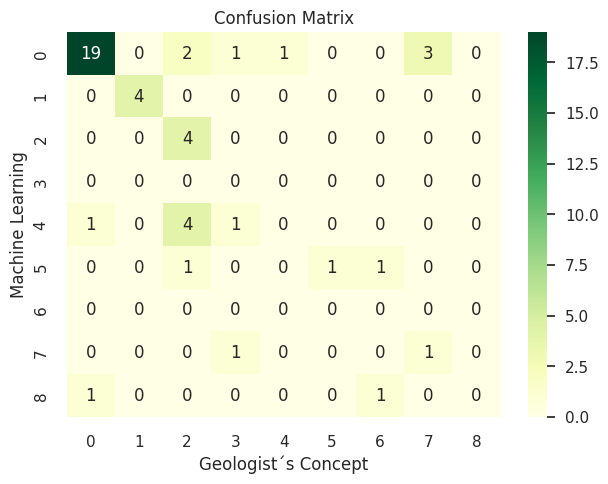

In [ ]:
class_predict_and_evaluate(model_DT, X_test_preproc, y_test_preproc,label_classes)

### by Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators = 500,
                               criterion = 'entropy',
                               min_samples_leaf=3, 
                               bootstrap = False,
                               class_weight = 'balanced_subsample',
                               random_state=seed) # tente mudar parâmetro para evitar overfitting
RFC_model.fit(X_train_preproc, y_train_preproc.ravel());


Elapsed time to compute the importances: 0.095 seconds


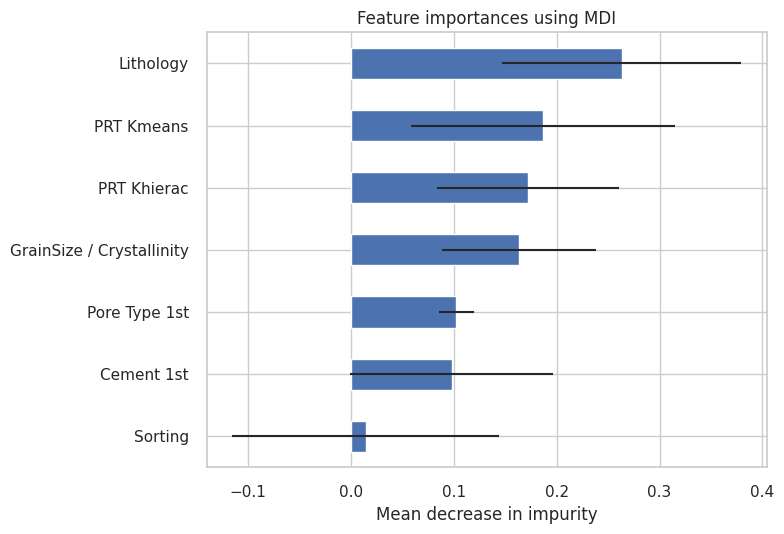

In [ ]:
import time
import numpy as np
import pandas as pd

start_time = time.time()

importances = RFC_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC_model.estimators_],
             axis=0)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', min_samples_leaf=3,
                       n_estimators=500, random_state=1)
Acurácia:  0.8297872340425532
Kappa:  0.751487111698612
F1:  0.7962534690101757


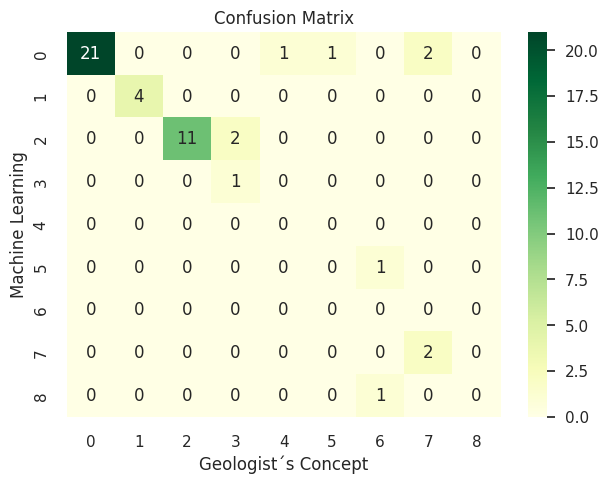

In [ ]:
class_predict_and_evaluate(RFC_model, X_test_preproc, y_test_preproc, label_classes)

## Classification Performance Evaluation

# Part 5 - Conclusion

-------------------------------------------------------------------------------------------

# =====   END   =====